### 1) Problem statement
- Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

- The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

- OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

- Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

- The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. The objective is to analyze the data provided and, with the help of a classification model:

- Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


### 2) Data Collection
- Dataset Source - Ineuron
- The data consists of 12 column and 25480 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn

In [98]:
# Importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
df = pd.read_csv('Visadataset.csv')



In [2]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Shape of the dataset

In [3]:
df.shape

(25480, 12)

### 2.2 Dataset information


#### The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.
- case_id: ID of each visa application
- continent: Information of continent of the employee ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
- education_of_employee: Information of education of the employee ['High School' "Master's" "Bachelor's" 'Doctorate']
- has_job_experience: Does the employee has any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company ['West' 'Northeast' 'South' 'Midwest' 'Island']
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information of foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
- case_status: Flag indicating if the Visa was certified or denied ['Denied' 'Certified']

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [4]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [5]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### 3.4 Checking the number of unique values of each column

In [7]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

### 3.5 Check statistics of data set

In [8]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Insight
- No_of employees: the mean is around 5667 with std 22877 which is so high the min number of employees is -26 it seems to be outlier and max 602069 and henc the median is 2109 and mean 5667 so there is alot of outliers
- yr_of_estab: the oldest company had been established on 1800 and the newest one on 2016 with mean 1979 and std 42 
- prevailing_wage: the mean and median are far away and the std is very high ths min is 2.13 which is very very low and the highest is 3192210

### 3.7 Exploring Data


In [9]:
print("Categories in 'continent' variable:     ",end=" " )
print(df['continent'].unique())

print("Categories in 'education_of_employee' variable:  ",end=" ")
print(df['education_of_employee'].unique())

print("Categories in'has_job_experience' variable:",end=" " )
print(df['has_job_experience'].unique())

print("Categories in 'requires_job_training' variable:     ",end=" " )
print(df['requires_job_training'].unique())

print("Categories in 'region_of_employment' variable:     ",end=" " )
print(df['region_of_employment'].unique())

print("Categories in 'unit_of_wage' variable:     ",end=" " )
print(df['unit_of_wage'].unique())

print("Categories in 'full_time_position' variable:     ",end=" " )
print(df['full_time_position'].unique())

print("Categories in 'case_status' variable:     ",end=" " )
print(df['case_status'].unique())


Categories in 'continent' variable:      ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
Categories in 'education_of_employee' variable:   ['High School' "Master's" "Bachelor's" 'Doctorate']
Categories in'has_job_experience' variable: ['N' 'Y']
Categories in 'requires_job_training' variable:      ['N' 'Y']
Categories in 'region_of_employment' variable:      ['West' 'Northeast' 'South' 'Midwest' 'Island']
Categories in 'unit_of_wage' variable:      ['Hour' 'Year' 'Week' 'Month']
Categories in 'full_time_position' variable:      ['Y' 'N']
Categories in 'case_status' variable:      ['Denied' 'Certified']


In [10]:
# define numerical & categorical columns
#numeric_features = [feature for feature in df.columns if len(df[feature].unique()) > 10]
#categorical_features = [feature for feature in df.columns if len(df[feature].unique()) <= 10]

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


it's only 8 categorical features because ID can't be considered as categorical feature it's just a unique code to identify each application

### 4. Exploring Data ( Visualization )
#### 4.1 Visualization distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

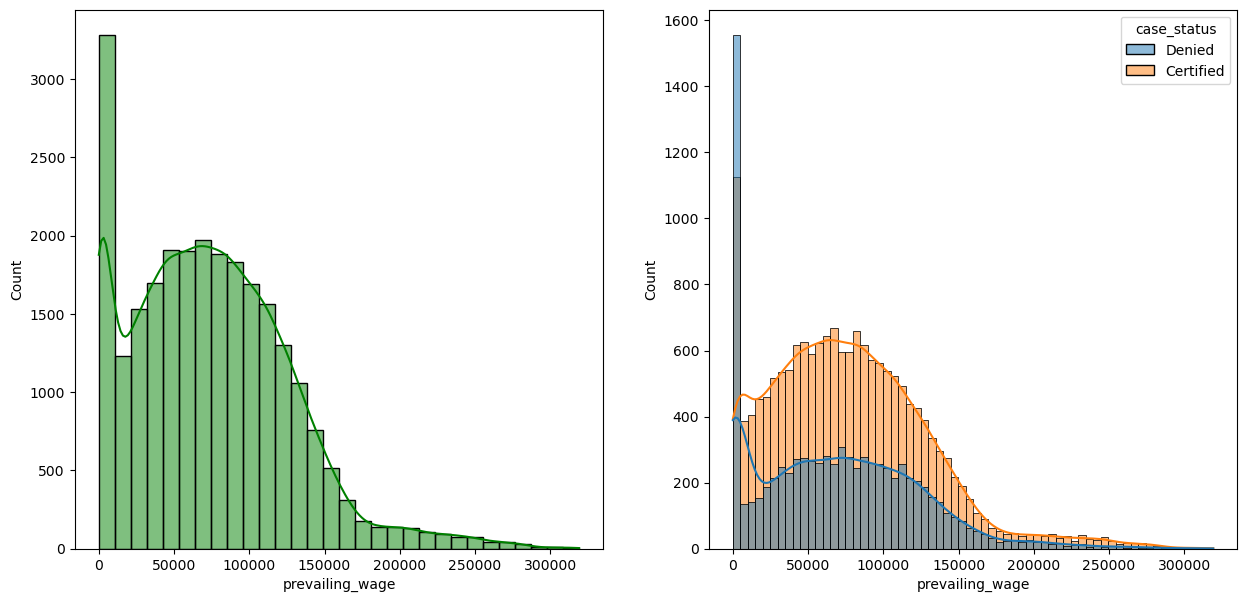

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='prevailing_wage',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='prevailing_wage',kde=True,hue='case_status')
plt.show()

It seems like the distrbution of Deneied and certified is likely the same for pervailing_wage

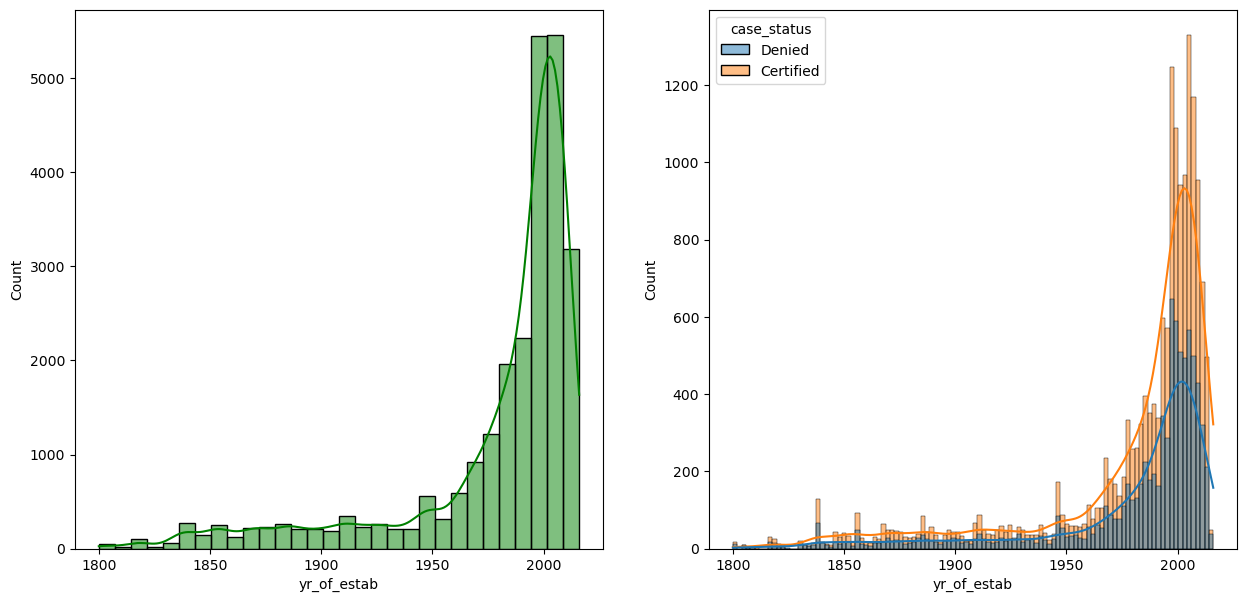

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='yr_of_estab',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='yr_of_estab',kde=True,hue='case_status')
plt.show()

It seems like the distrbution of Deneied and certified is likely the same for yr_of_estab of the company

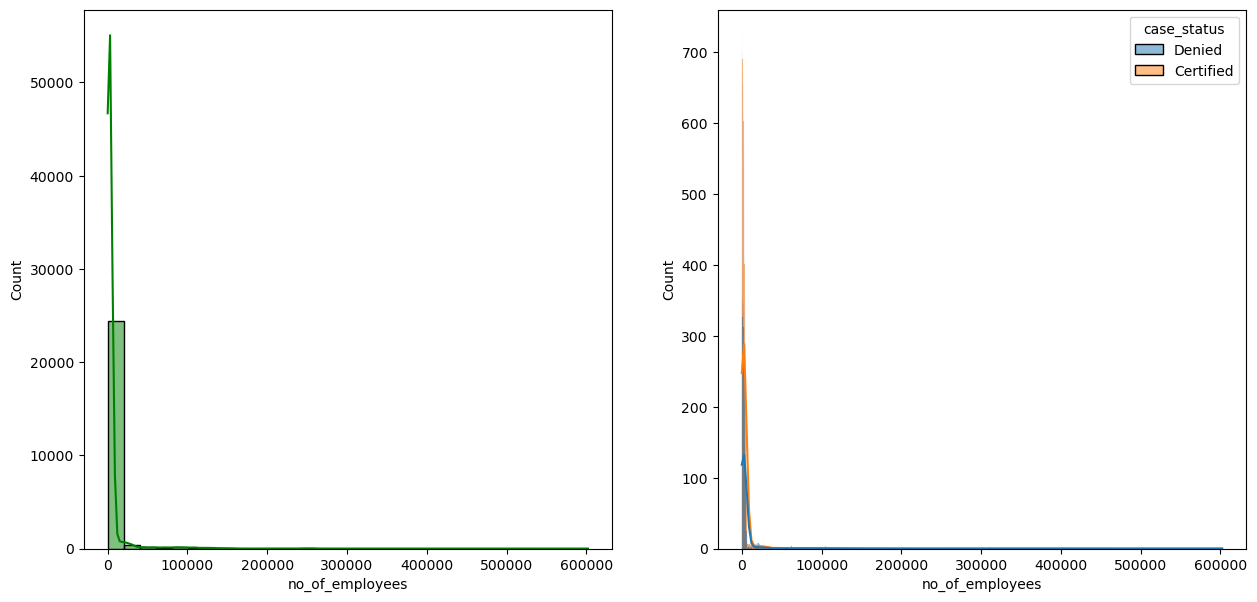

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='no_of_employees',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='no_of_employees',kde=True,hue='case_status')
plt.show()

It seems like there is alot of outliers here must to clean it 

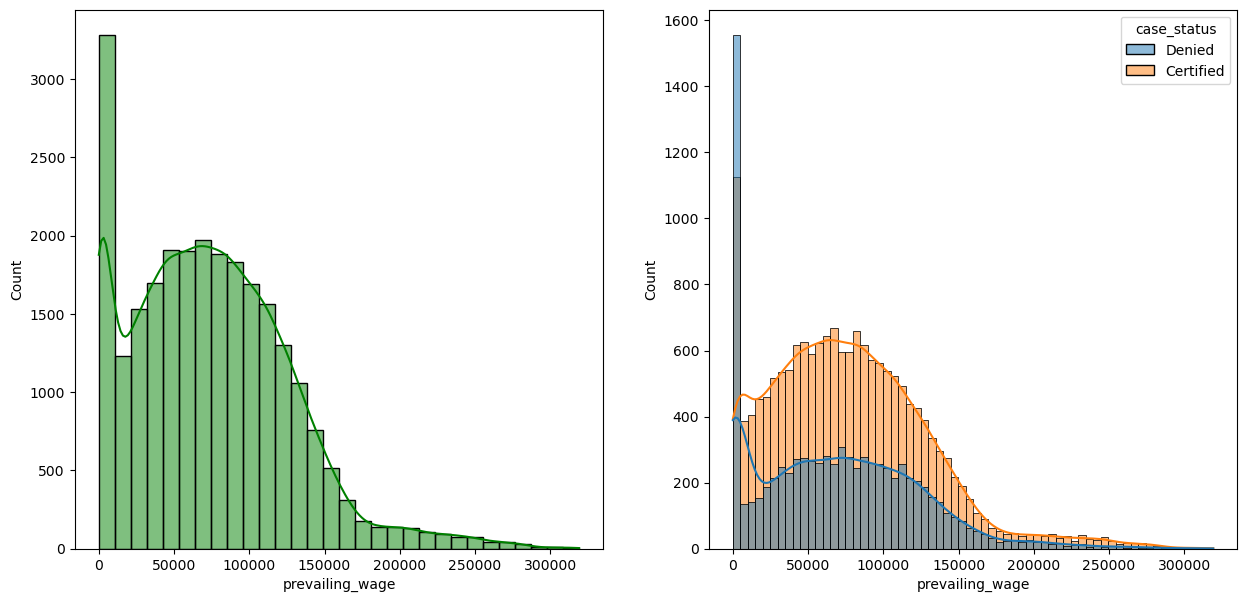

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='prevailing_wage',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='prevailing_wage',kde=True,hue='case_status')
plt.show()

#####  Insights


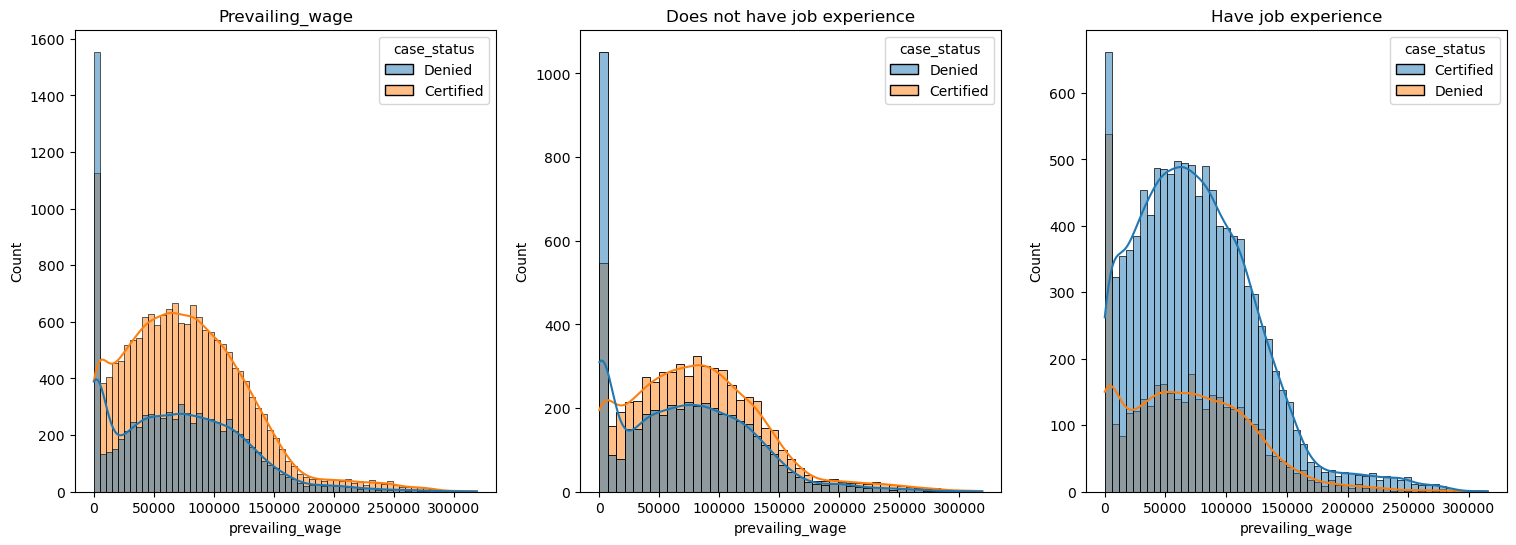

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='prevailing_wage',kde=True,hue='case_status')
plt.title('Prevailing_wage')
plt.subplot(142)
sns.histplot(data=df[df['has_job_experience']=='N'],x='prevailing_wage',kde=True,hue='case_status')
plt.title('Does not have job experience')
plt.subplot(143)
sns.histplot(data=df[df['has_job_experience']=='Y'],x='prevailing_wage',kde=True,hue='case_status')
plt.title('Have job experience')
plt.show()

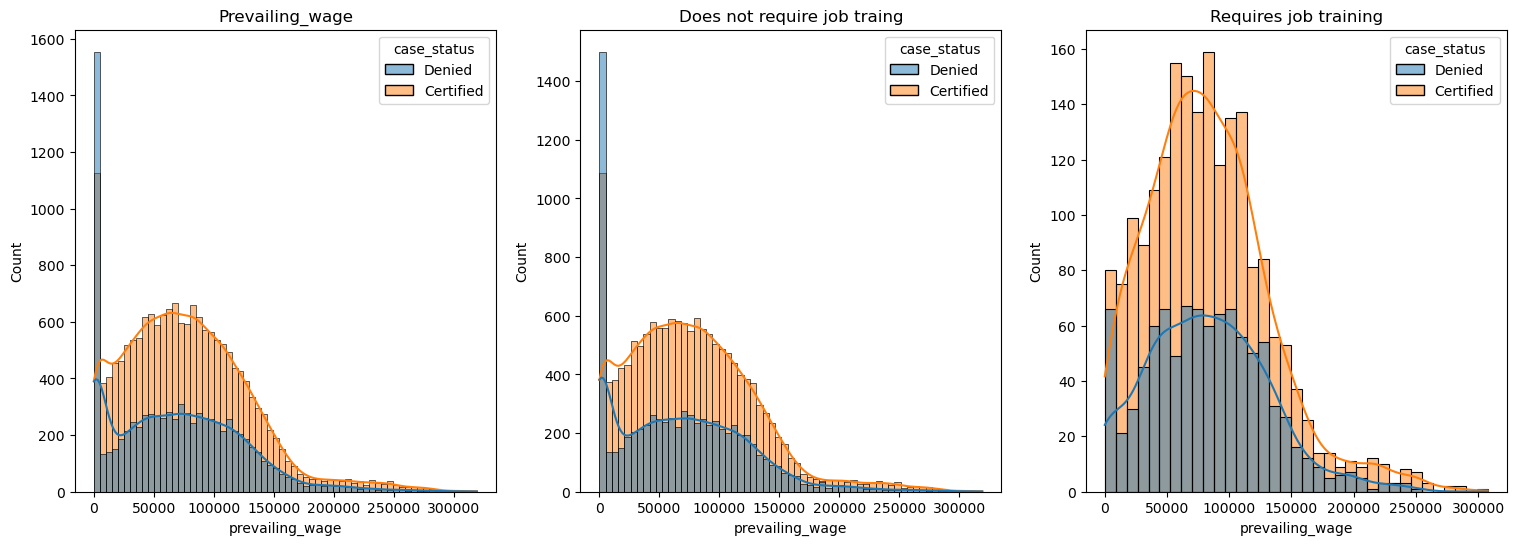

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='prevailing_wage',kde=True,hue='case_status')
plt.title('Prevailing_wage')
plt.subplot(142)
sns.histplot(data=df[df['requires_job_training']=='N'],x='prevailing_wage',kde=True,hue='case_status')
plt.title('Does not require job traing')
plt.subplot(143)
sns.histplot(data=df[df['requires_job_training']=='Y'],x='prevailing_wage',kde=True,hue='case_status')
plt.title('Requires job training')
plt.show()

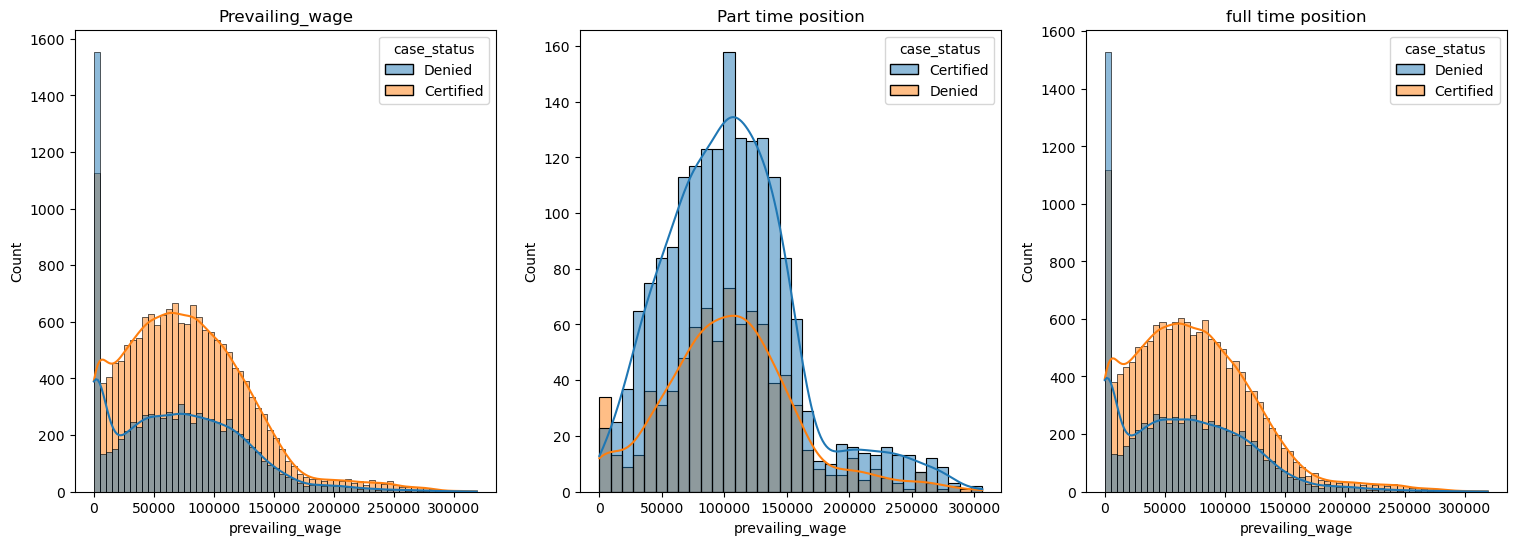

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='prevailing_wage',kde=True,hue='case_status')
plt.title('Prevailing_wage')
plt.subplot(142)
sns.histplot(data=df[df['full_time_position']=='N'],x='prevailing_wage',kde=True,hue='case_status')
plt.title('Part time position')
plt.subplot(143)
sns.histplot(data=df[df['full_time_position']=='Y'],x='prevailing_wage',kde=True,hue='case_status')
plt.title('full time position')
plt.show()

#### 4.2 

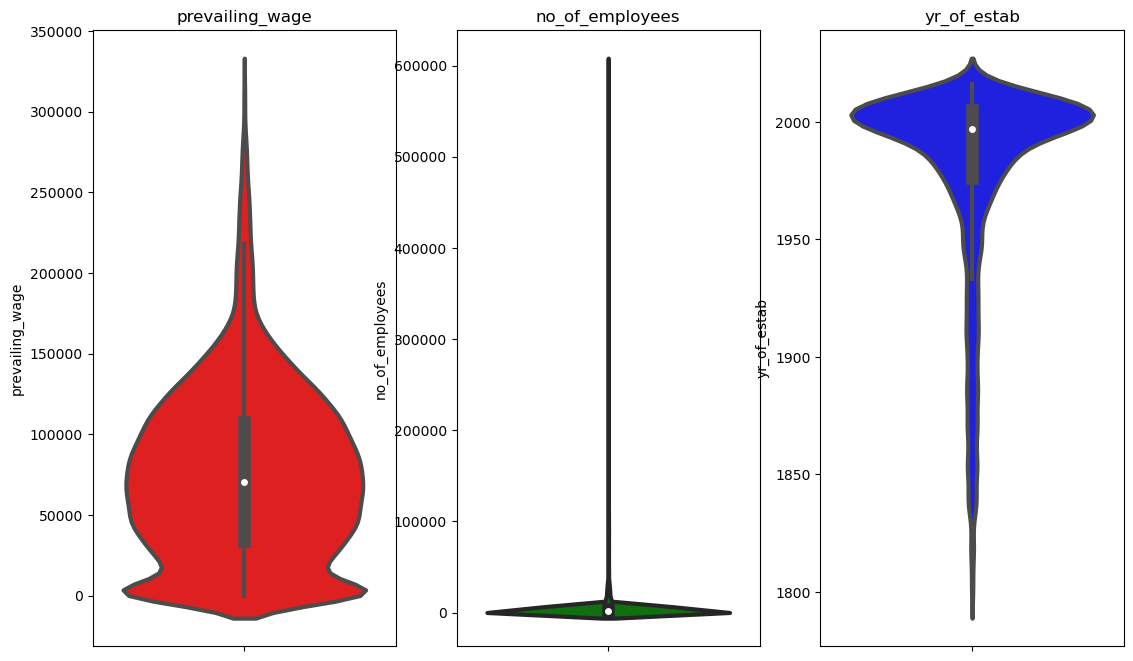

In [37]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('prevailing_wage')
sns.violinplot(y='prevailing_wage',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('no_of_employees')
sns.violinplot(y='no_of_employees',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('yr_of_estab')
sns.violinplot(y='yr_of_estab',data=df,color='blue',linewidth=3)
plt.show()

It seems like most of the companies established after year 2000 , and the distrbution of prevailing wage is right skwed and the no_of employees contain's outliers need to be cleaned

#### 4.3 Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

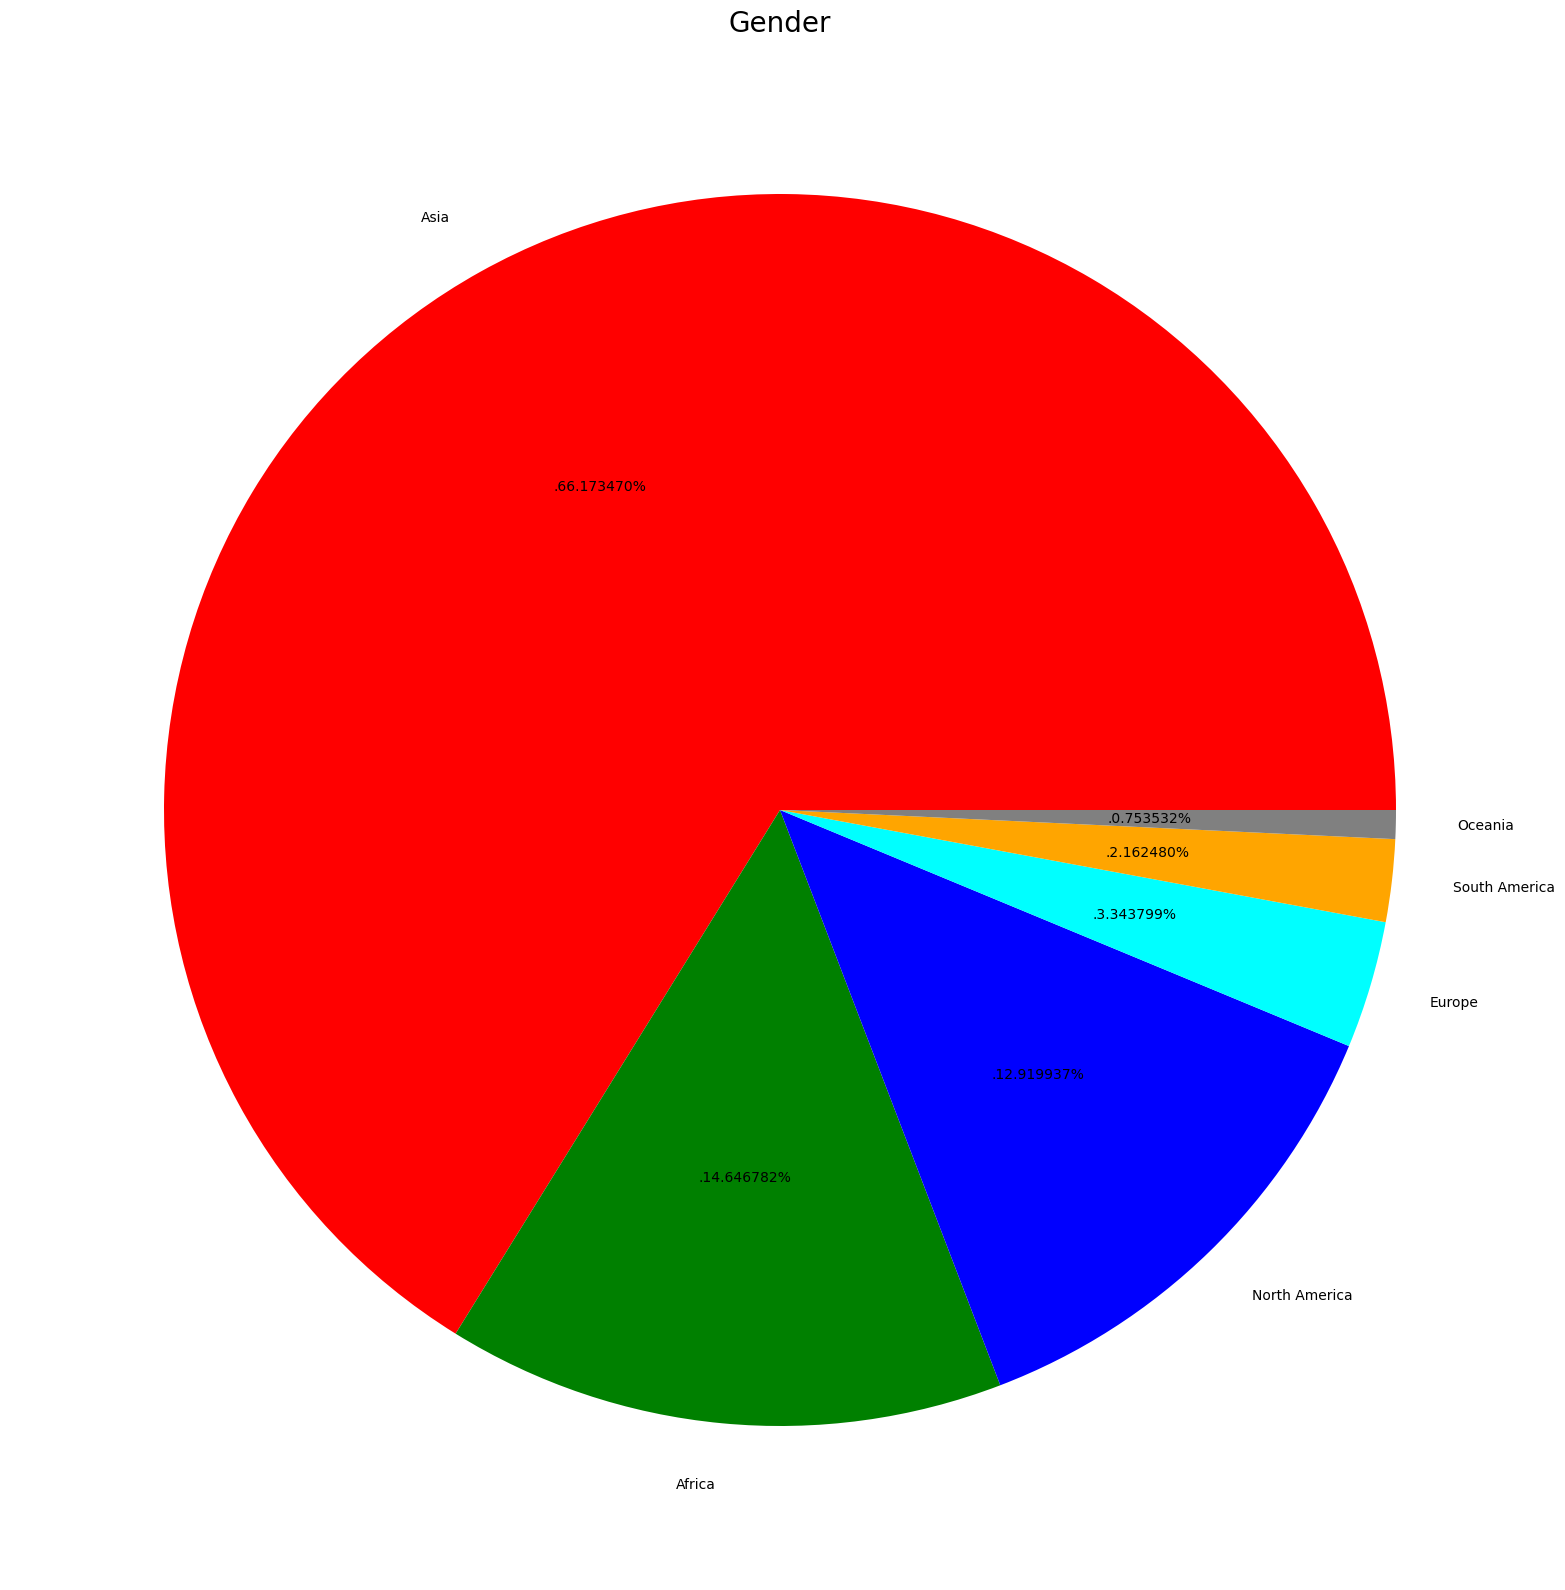

In [40]:
plt.rcParams['figure.figsize'] = (40, 20)

size = df['continent'].value_counts()
labels = 'Asia','Africa','North America','Europe','South America','Oceania'
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

 most of the employees are from Asia and the least are from Ocenina

(-1.25, 1.25, -1.25, 1.25)

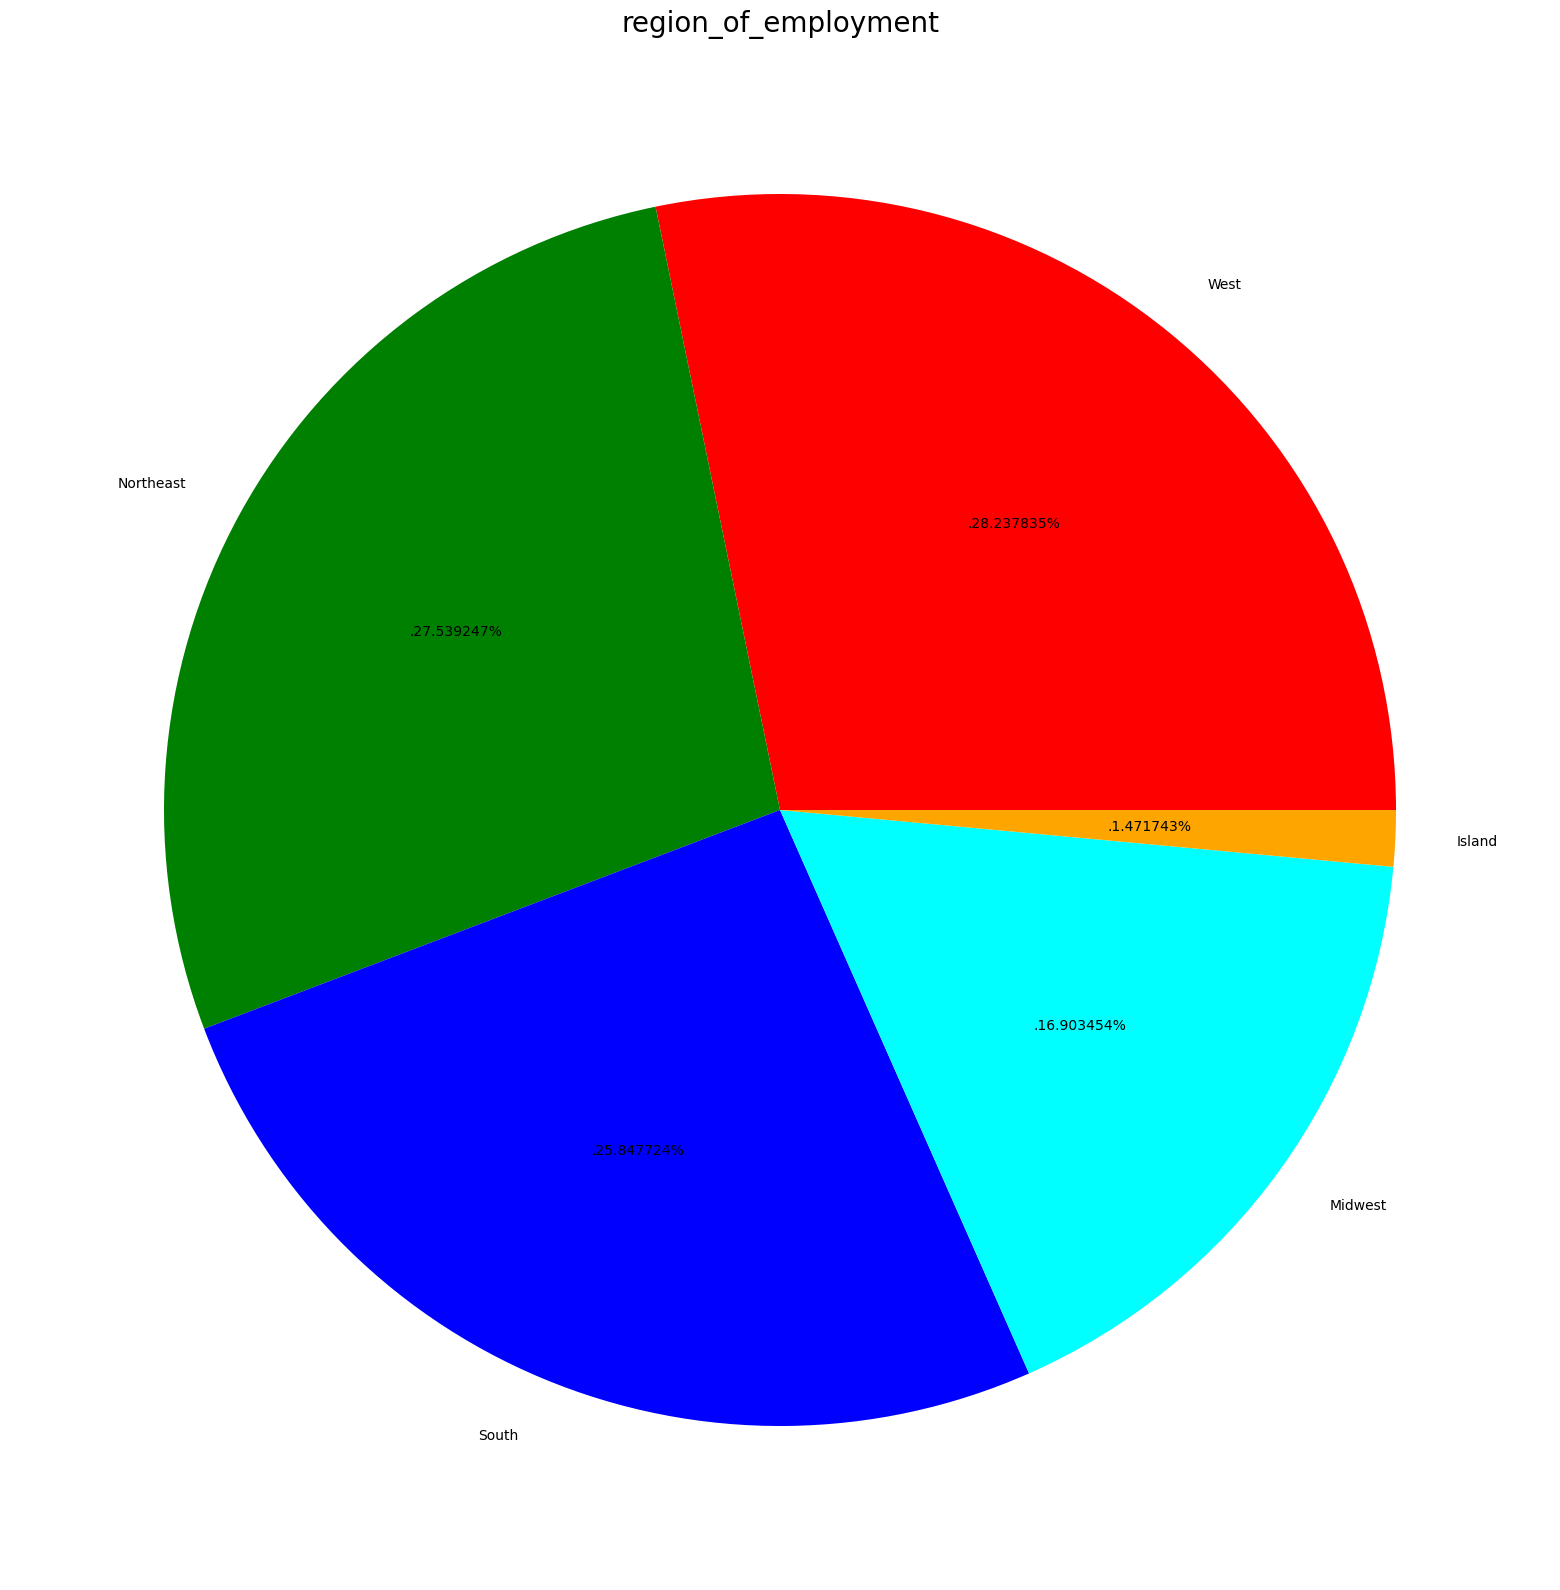

In [41]:
size = df['region_of_employment'].value_counts()
labels = 'West','Northeast','South','Midwest','Island'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('region_of_employment', fontsize = 20)
plt.axis('off')

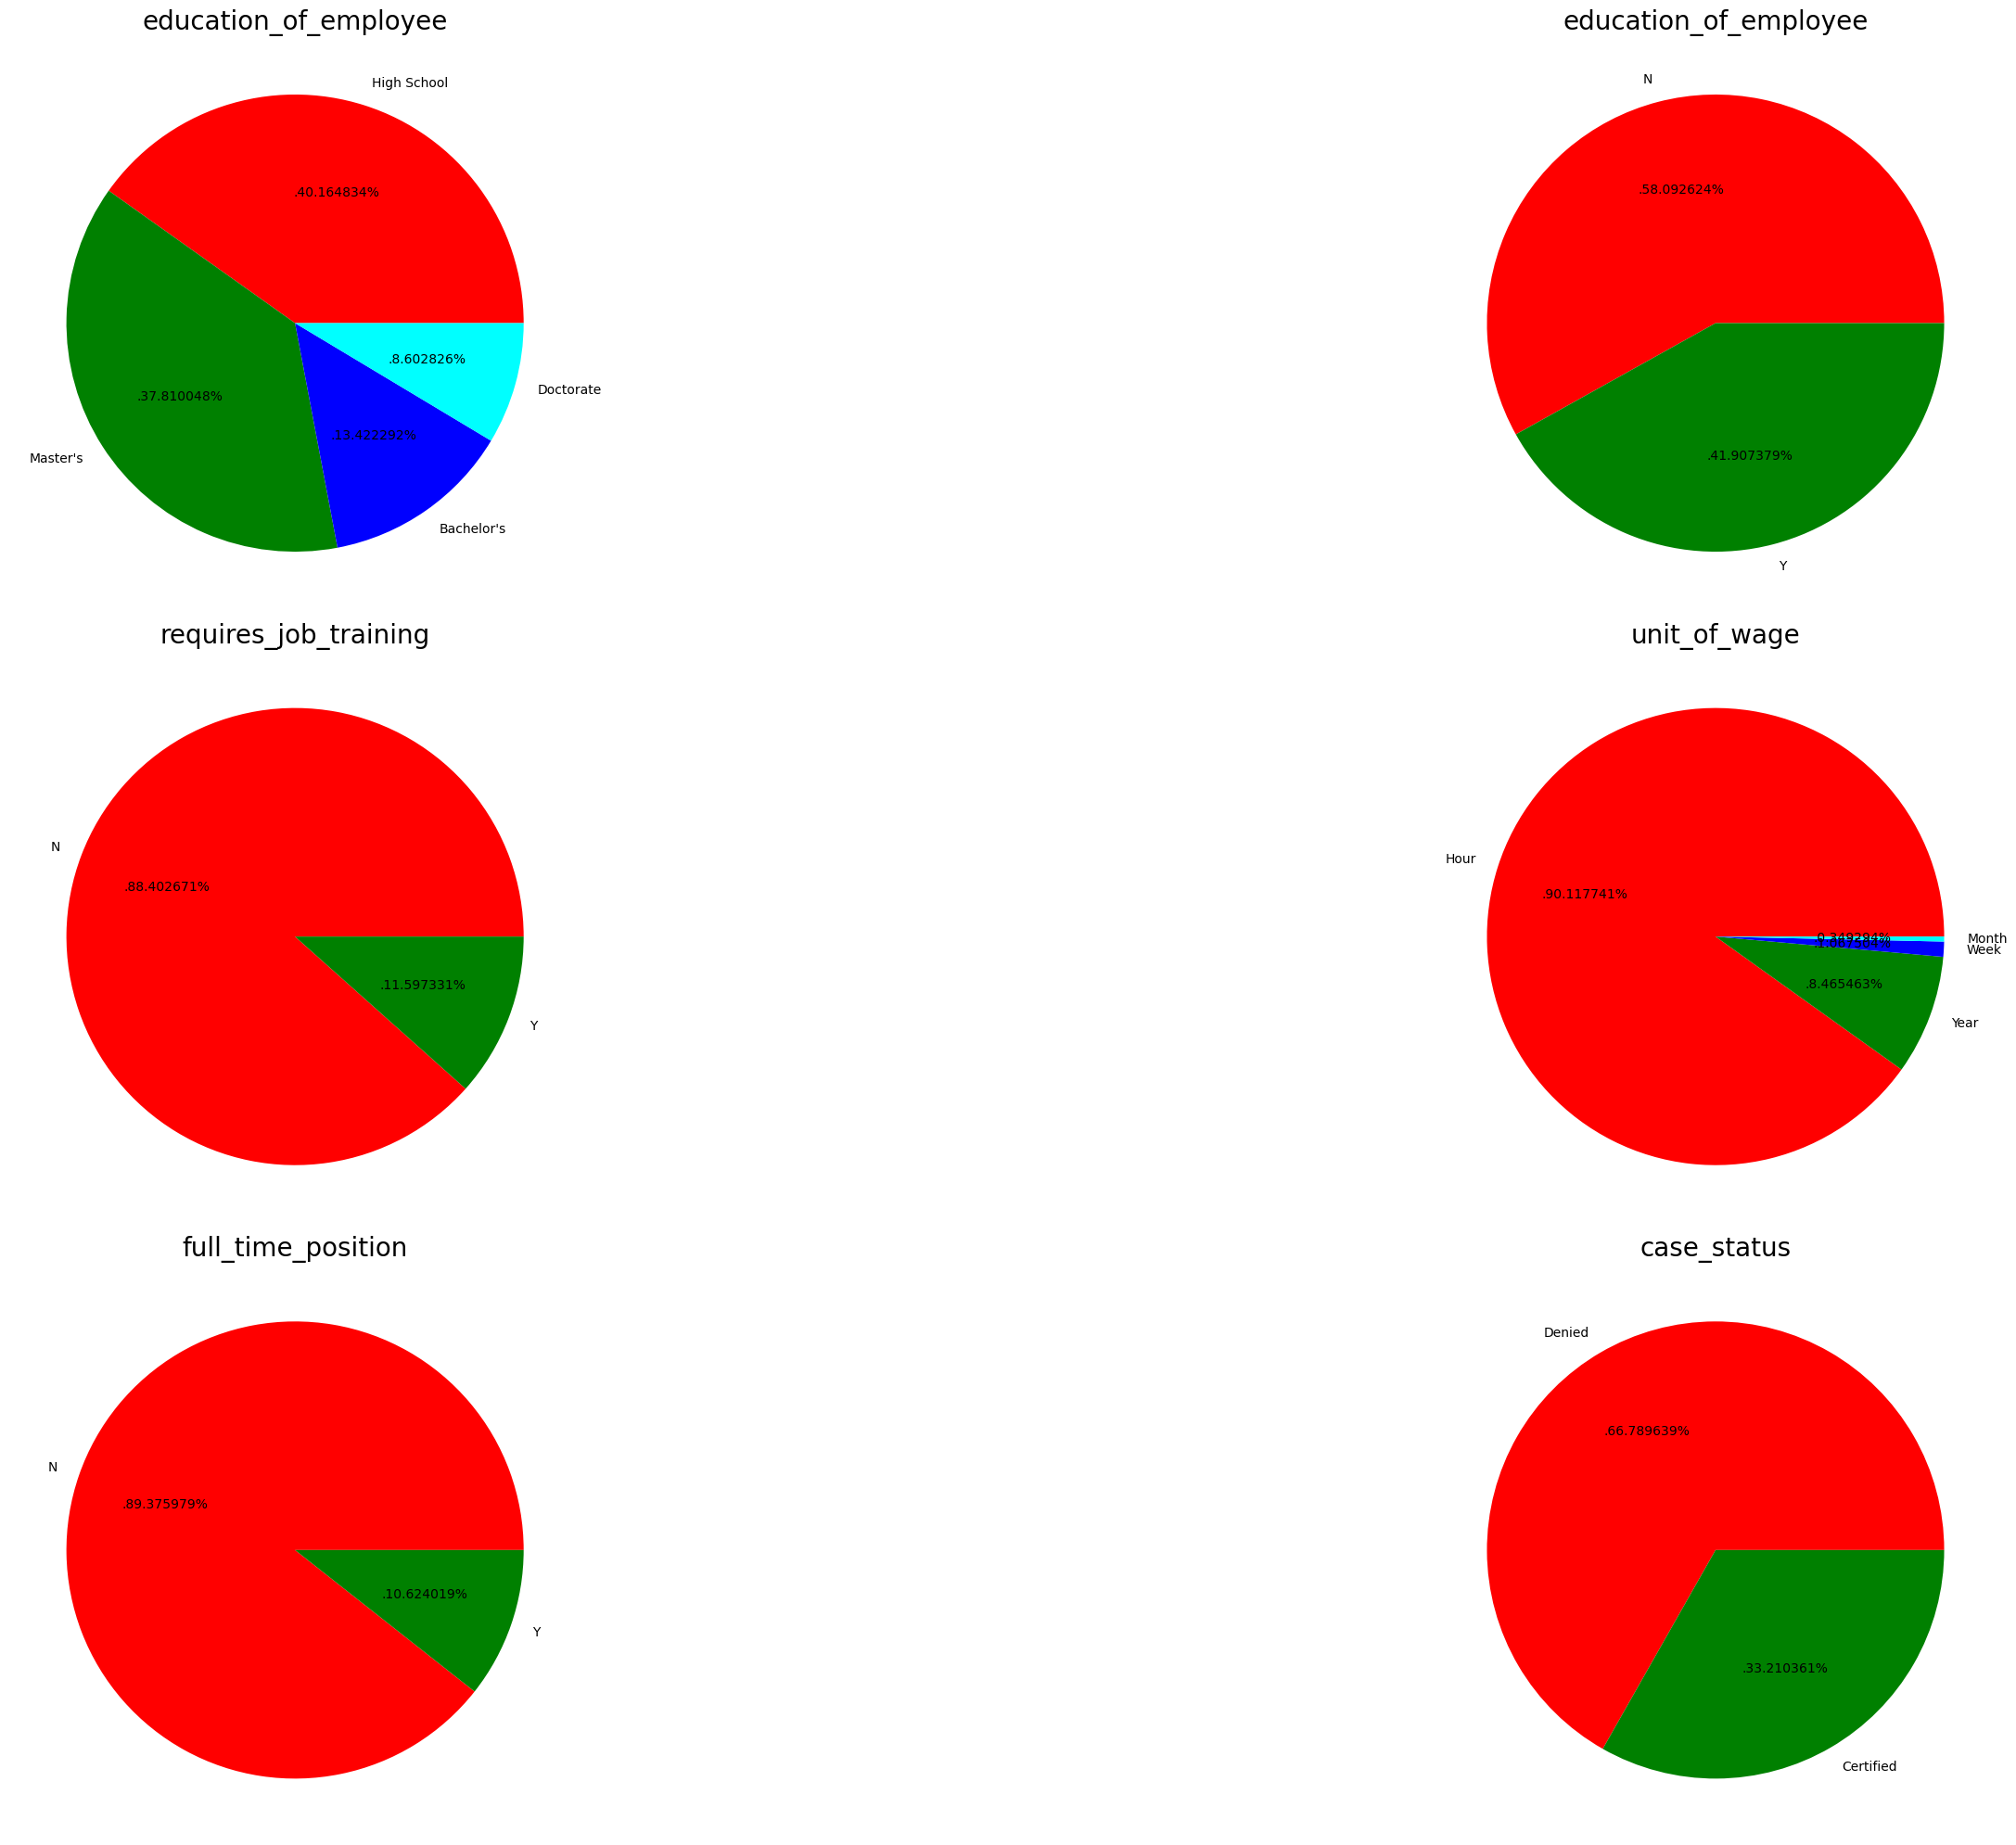

In [43]:
plt.rcParams['figure.figsize'] = (40, 20)

plt.subplot(3,2,1)
size = df['education_of_employee'].value_counts()
labels = 'High School', "Master's", "Bachelor's", 'Doctorate'
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('education_of_employee', fontsize = 20)
plt.axis('off')



plt.subplot(3,2, 2)
size = df['has_job_experience'].value_counts()
labels = 'N','Y'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('education_of_employee', fontsize = 20)
plt.axis('off')


plt.subplot(3,2, 3)
size = df['requires_job_training'].value_counts()
labels = 'N','Y'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('requires_job_training', fontsize = 20)
plt.axis('off')


plt.subplot(3,2, 4)
size = df['unit_of_wage'].value_counts()
labels = 'Hour','Year','Week','Month'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('unit_of_wage', fontsize = 20)
plt.axis('off')




plt.subplot(3,2, 5)
size = df['full_time_position'].value_counts()
labels = 'N','Y'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('full_time_position', fontsize = 20)
plt.axis('off')


plt.subplot(3,2, 6)
size = df['case_status'].value_counts()
labels = 'Denied','Certified'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('case_status', fontsize = 20)
plt.axis('off')







plt.tight_layout()
plt.grid()

plt.show()

#### 4.4 Feature Wise Visualization

#### UNIVARIATE ANALYSIS

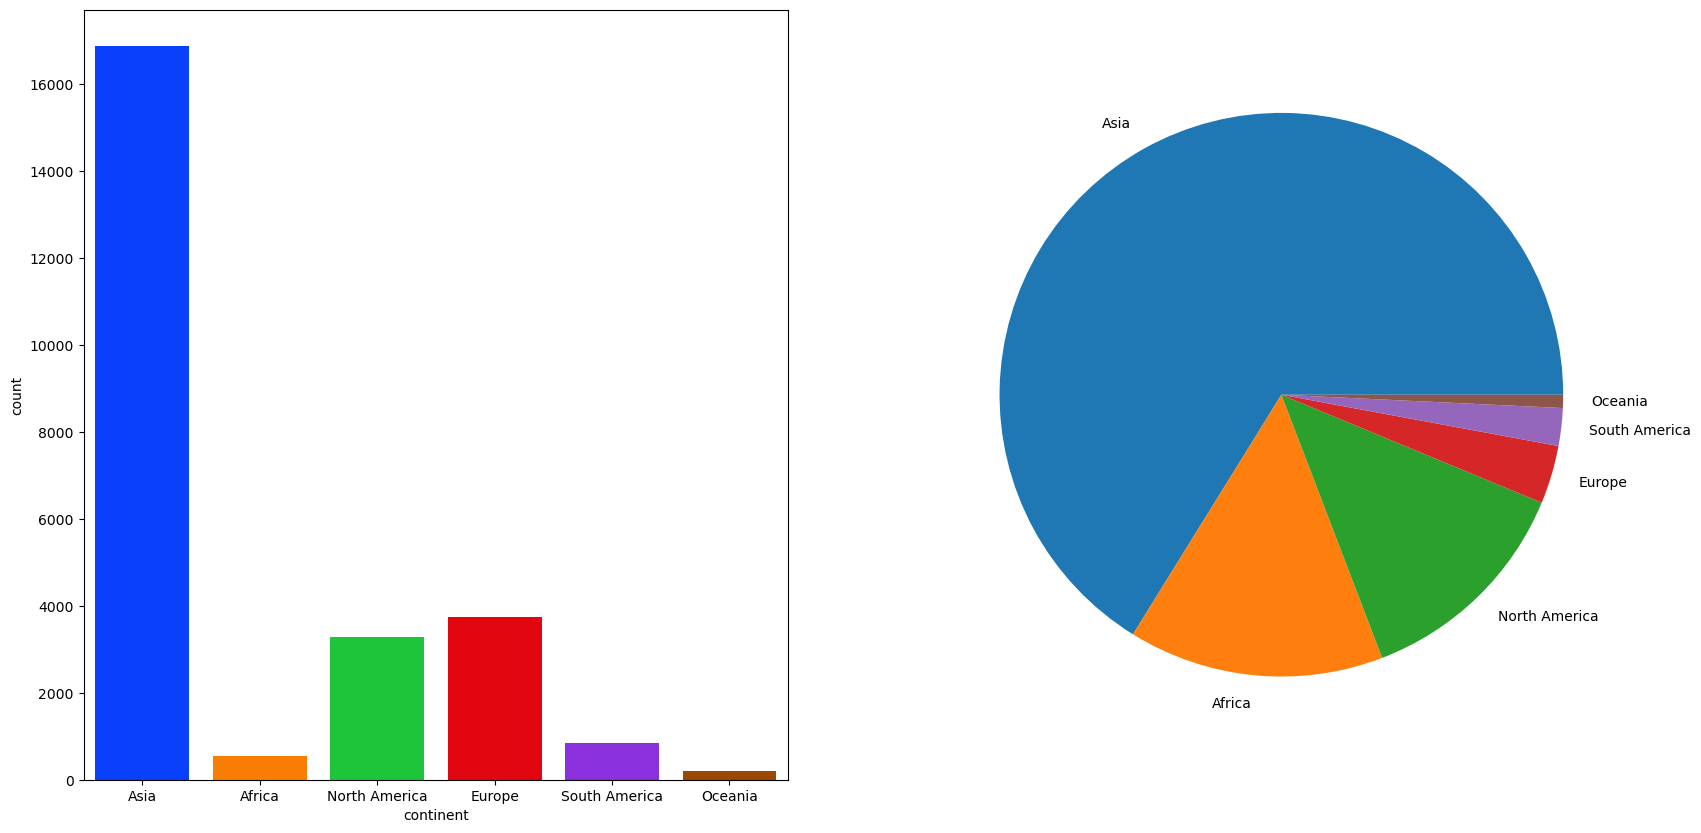

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['continent'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
    
plt.pie(x=df['continent'].value_counts(),labels=['Asia','Africa','North America','Europe','South America','Oceania'])
plt.show()

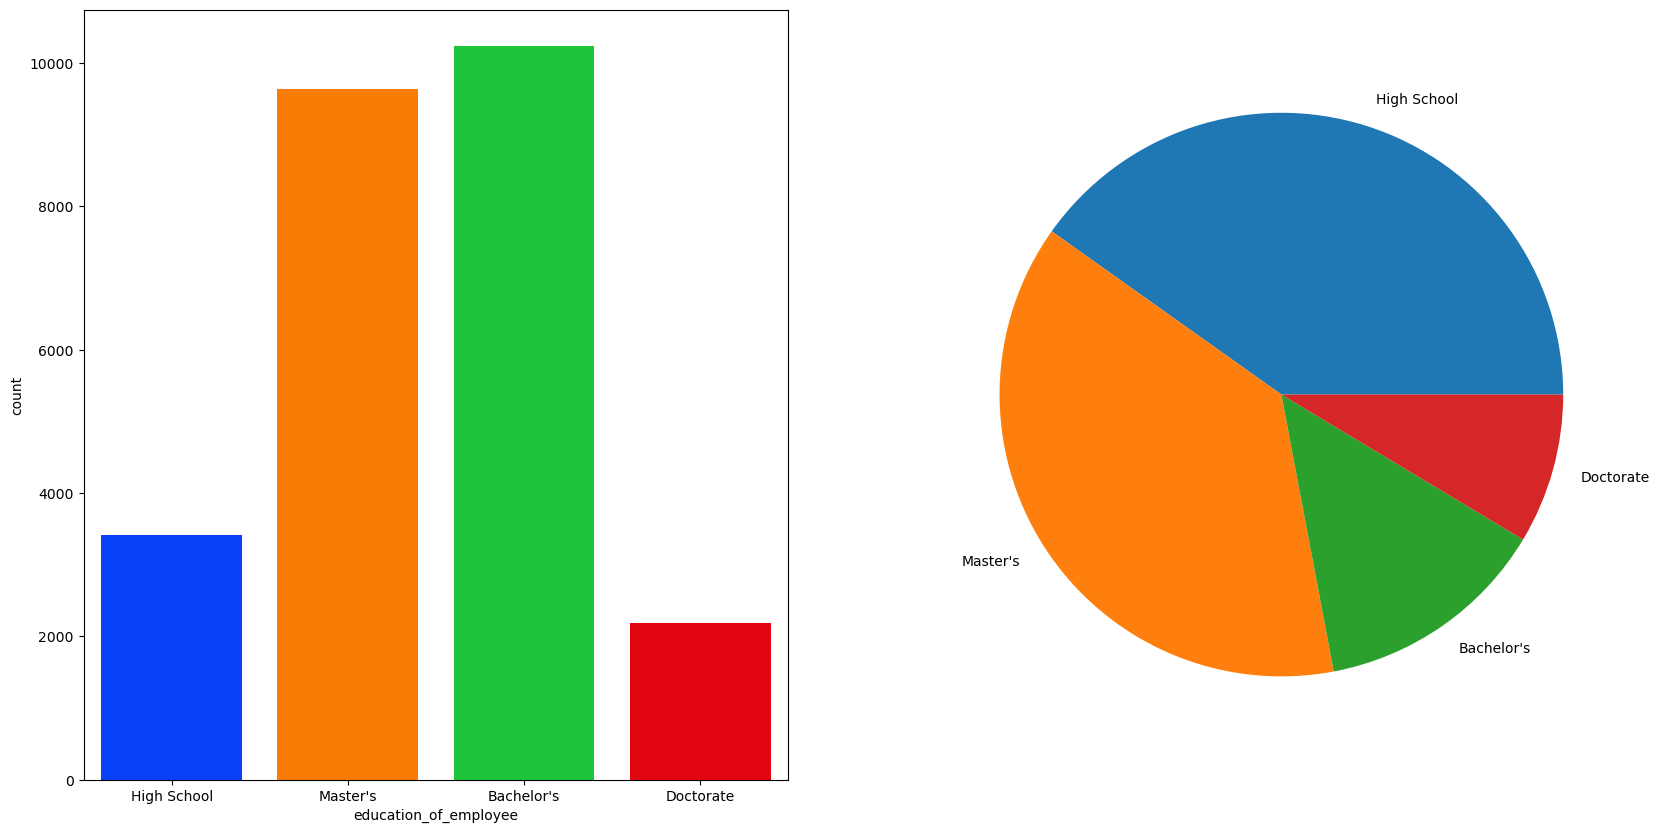

In [62]:



f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['education_of_employee'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
    
plt.pie(x=df['education_of_employee'].value_counts(),labels=['High School',"Master's","Bachelor's",'Doctorate'])
plt.show()

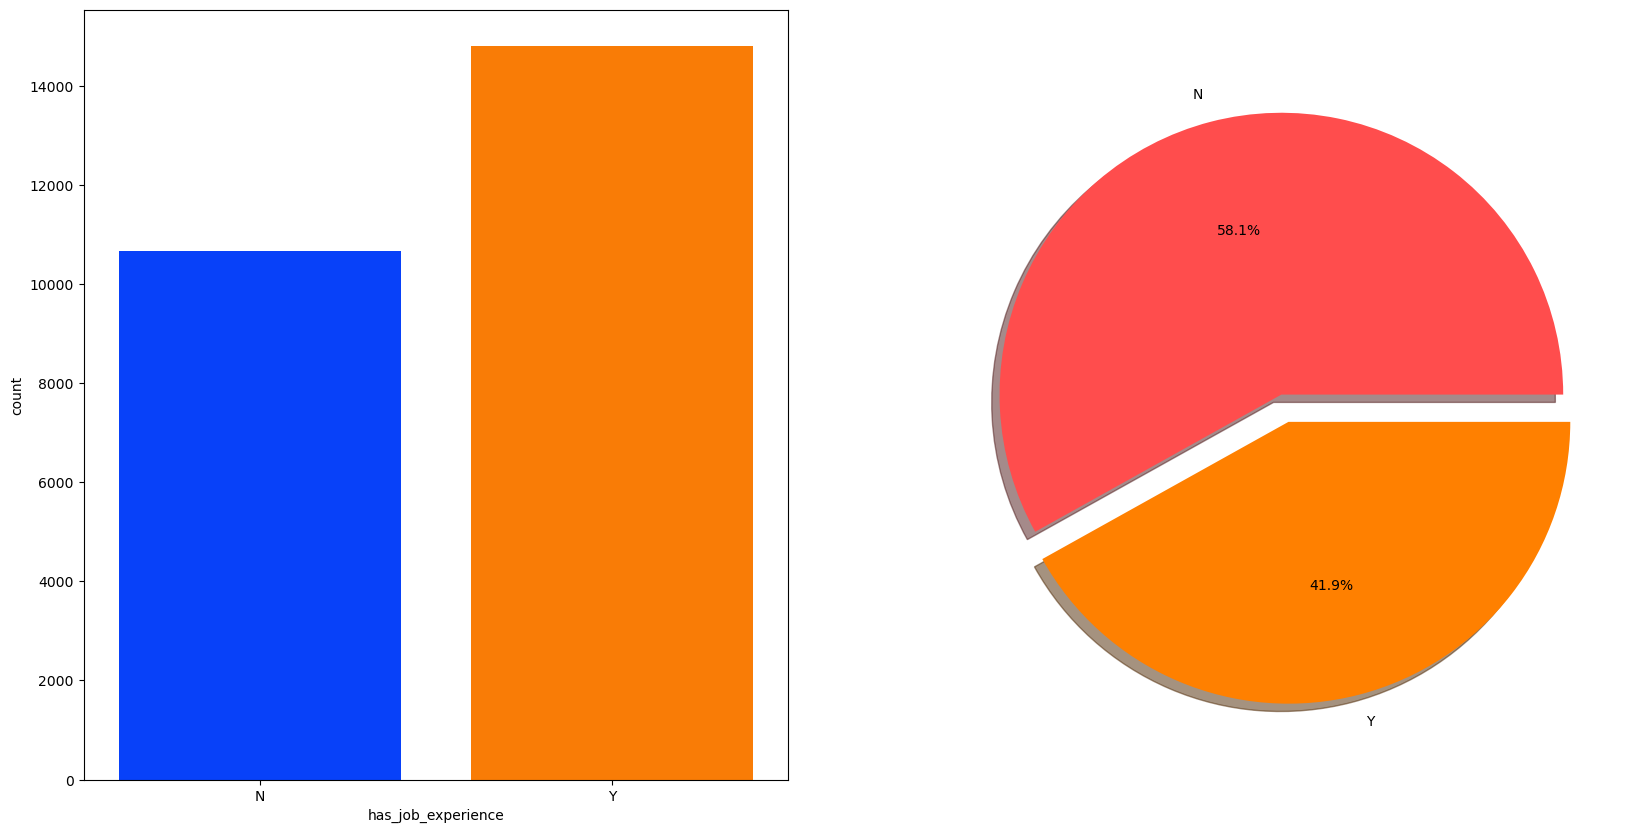

In [63]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['has_job_experience'],data=df,palette ='bright',ax=ax[0],saturation=0.95)   
plt.pie(x=df['has_job_experience'].value_counts(),labels=['N','Y'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

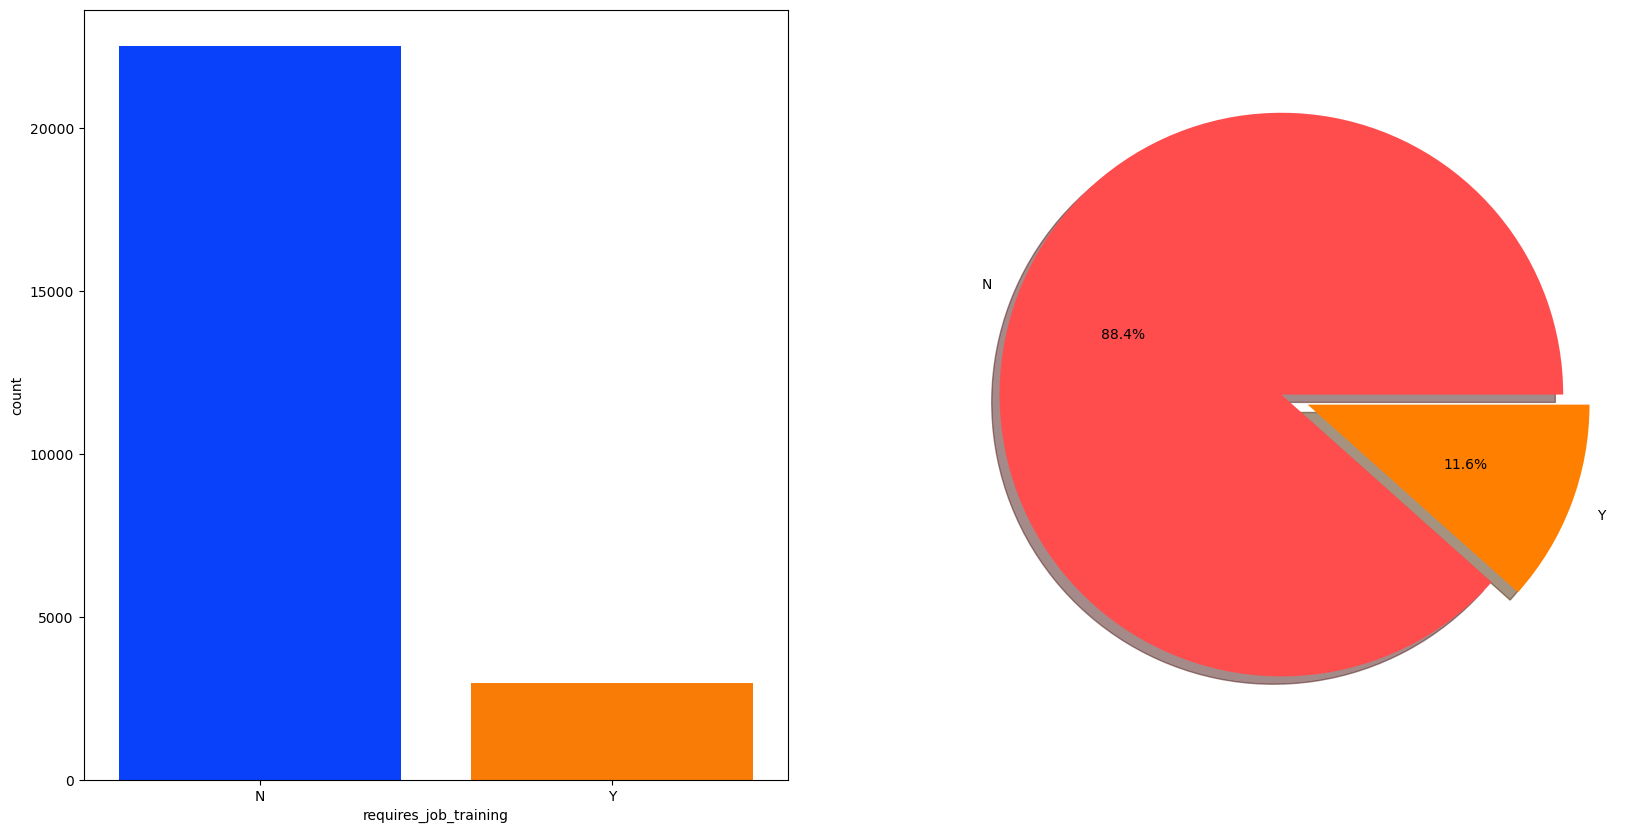

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['requires_job_training'],data=df,palette ='bright',ax=ax[0],saturation=0.95)   
plt.pie(x=df['requires_job_training'].value_counts(),labels=['N','Y'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

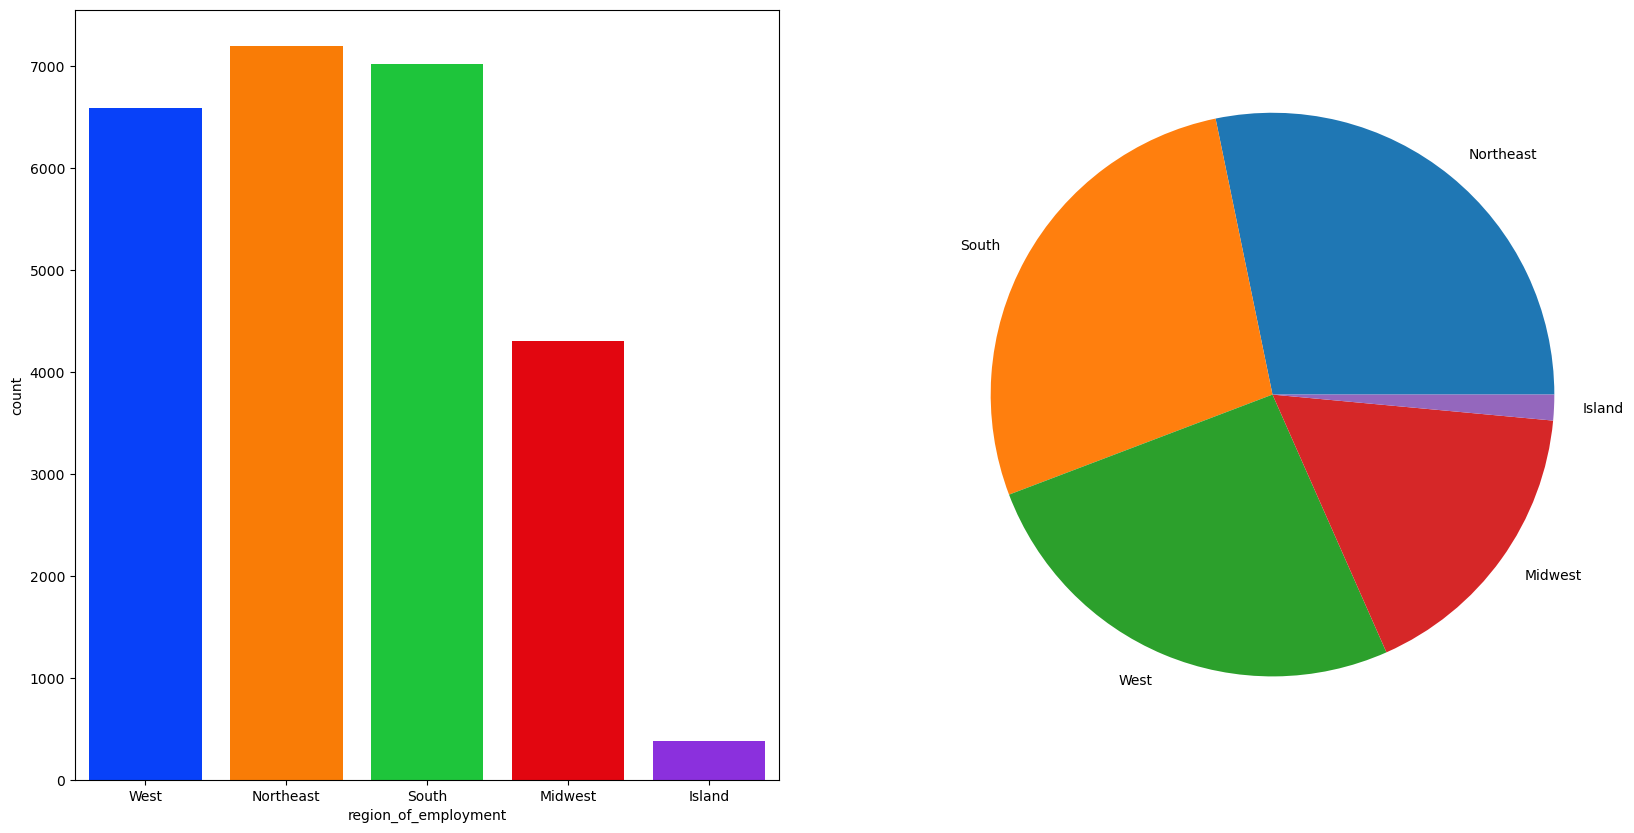

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['region_of_employment'],data=df,palette ='bright',ax=ax[0],saturation=0.95)   
plt.pie(x=df['region_of_employment'].value_counts(),labels=['Northeast','South','West','Midwest','Island'])
plt.show()

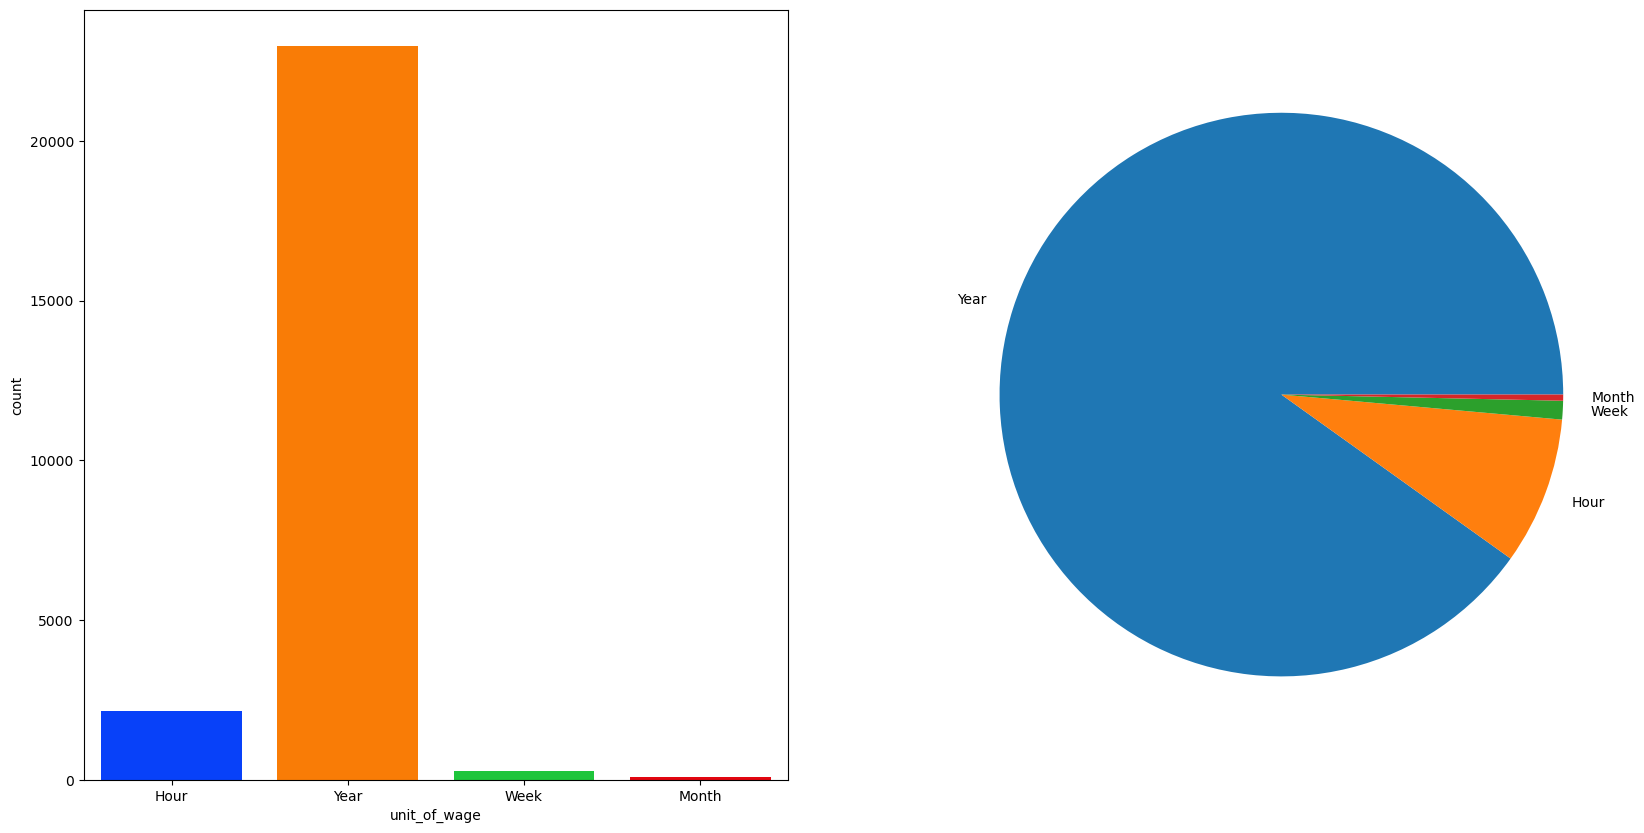

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['unit_of_wage'],data=df,palette ='bright',ax=ax[0],saturation=0.95)   
plt.pie(x=df['unit_of_wage'].value_counts(),labels=['Year','Hour','Week','Month'])
plt.show()

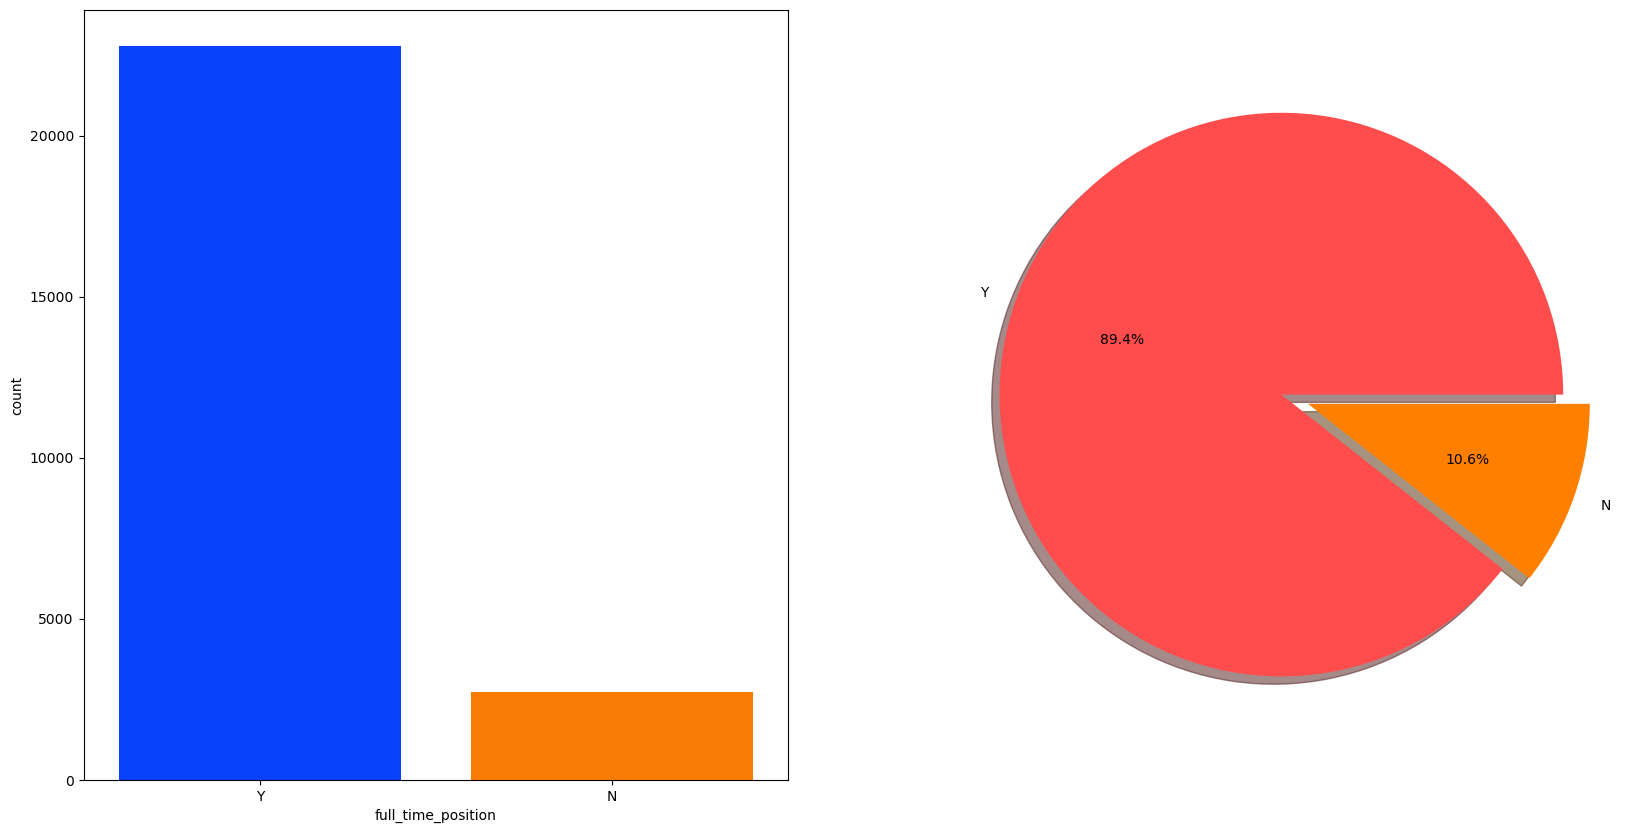

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['full_time_position'],data=df,palette ='bright',ax=ax[0],saturation=0.95)   
plt.pie(x=df['full_time_position'].value_counts(),labels=['Y','N'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

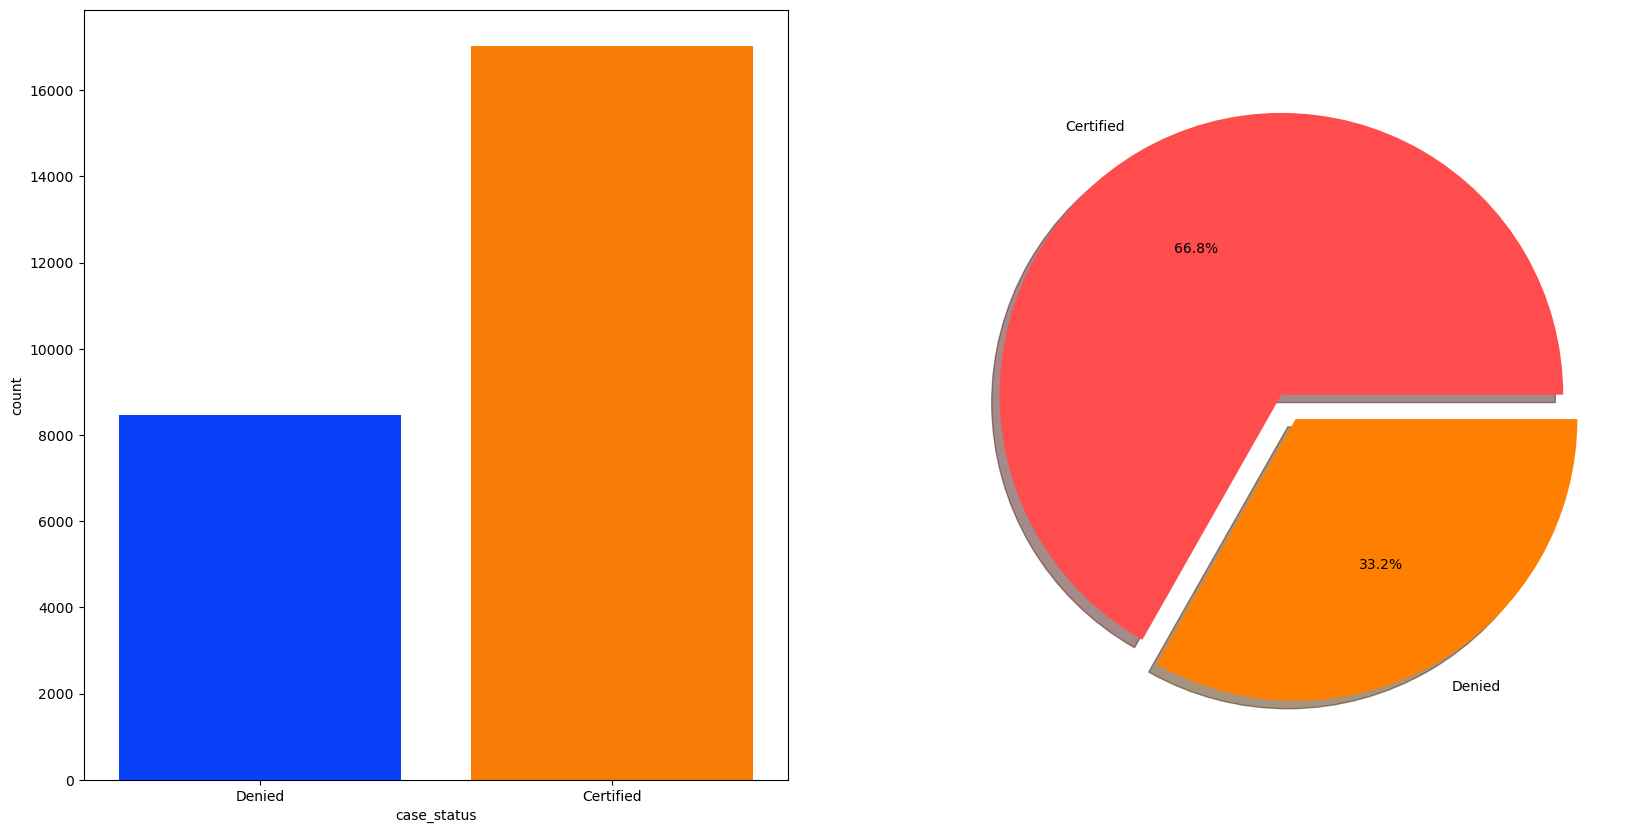

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['case_status'],data=df,palette ='bright',ax=ax[0],saturation=0.95)   
plt.pie(x=df['case_status'].value_counts(),labels=['Certified','Denied'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [70]:
gender_group = df.groupby('full_time_position').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
full_time_position,,,
N,6361.908016,1978.264869,104745.402727
Y,5584.445440,1979.546041,70855.326511


In [71]:
gender_group = df.groupby('continent').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
continent,,,
Africa,6918.132486,1977.361162,77425.923450
Asia,5314.370381,1980.336753,79543.021780
Europe,6463.569400,1977.452840,59842.925899
North America,6594.426792,1978.578068,68066.319257
Oceania,4110.619792,1978.036458,75994.276719
South America,5115.772300,1974.489437,60209.575314


In [72]:
gender_group = df.groupby('education_of_employee').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
education_of_employee,,,
Bachelor's,5166.243893,1979.947332,73405.443735
Doctorate,6825.950730,1978.754562,64561.076657
High School,4965.547076,1978.369883,71582.147756
Master's,6184.374715,1979.357380,78843.057843


In [73]:
gender_group = df.groupby('has_job_experience').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
has_job_experience,,,
N,5456.166511,1979.368983,75464.159920
Y,5819.167342,1979.439468,73728.405363


In [74]:
gender_group = df.groupby('requires_job_training').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
requires_job_training,,,
N,5712.991299,1979.509523,73404.75216
Y,5316.795939,1978.650761,82467.72027


In [75]:
gender_group = df.groupby('region_of_employment').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
region_of_employment,,,
Island,7085.114667,1976.634667,91712.750760
Midwest,4432.128396,1980.641514,91696.741794
Northeast,5950.188742,1979.013621,67872.662819
South,5990.269061,1979.212484,74040.545216
West,5740.182205,1979.405861,69832.628698


In [76]:
gender_group = df.groupby('unit_of_wage').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
unit_of_wage,,,
Hour,4221.774687,1973.943904,414.570513
Month,2759.595506,1973.516854,87592.864045
Week,6582.580882,1971.323529,85606.820515
Year,5803.232602,1980.042026,81228.077133


In [77]:
gender_group = df.groupby('full_time_position').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
full_time_position,,,
N,6361.908016,1978.264869,104745.402727
Y,5584.445440,1979.546041,70855.326511


In [78]:
gender_group = df.groupby('case_status').mean()
gender_group

,no_of_employees,yr_of_estab,prevailing_wage
case_status,,,
Certified,5807.018157,1979.666765,77293.619243
Denied,5385.538407,1978.893406,68748.681580


##  CHECKING OUTLIERS:

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


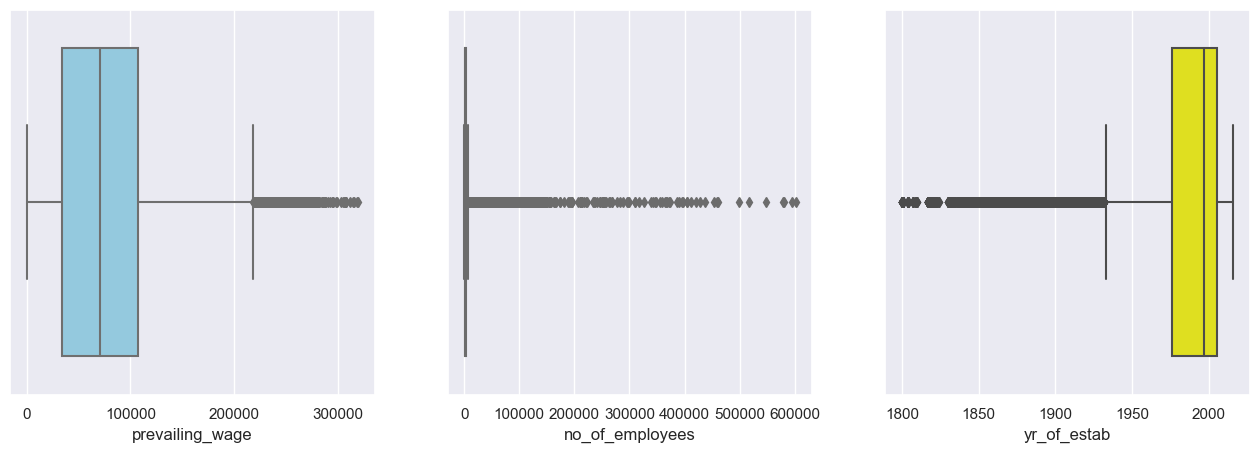

In [80]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(df['prevailing_wage'],color='skyblue')
plt.subplot(132)
sns.boxplot(df['no_of_employees'],color='hotpink')
plt.subplot(133)
sns.boxplot(df['yr_of_estab'],color='yellow')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

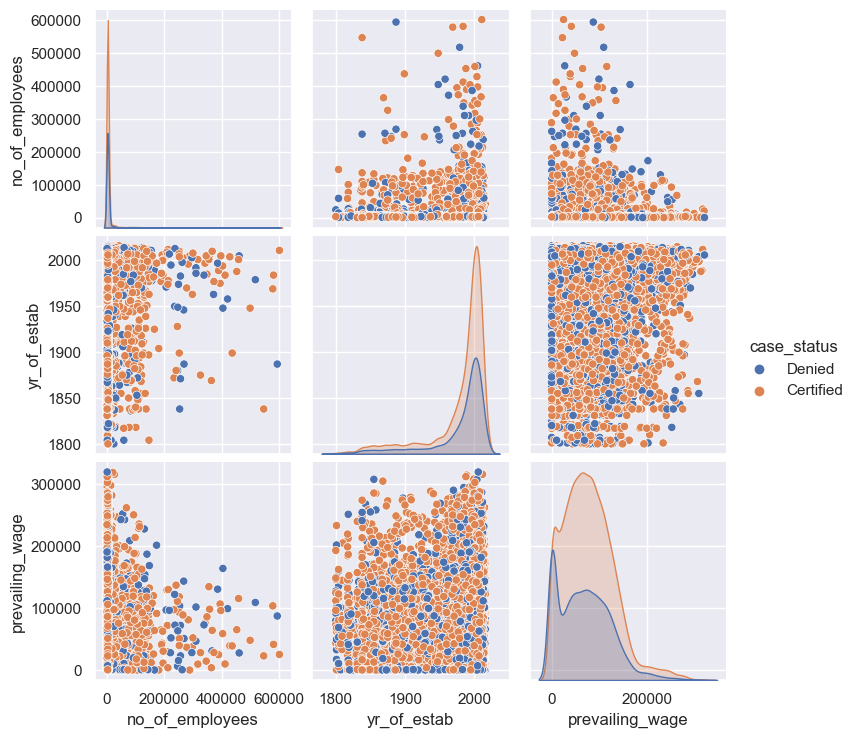

In [82]:
sns.pairplot(df,hue = 'case_status')
plt.show()

###  FEATURE ENGINEERING STEPS 
- Exploring Features of the dataset
- Hypothesis Testing 
- Checking for Normal Distribution using Transformations

### Hypothesis Testing
#### Checking correlation

In [84]:
df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


#### 2.2  Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [87]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]

In [88]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

C:\Users\Salma\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column Name,Shapiro Hypothesis Result
0,no_of_employees,Not Normally Distributed
1,yr_of_estab,Not Normally Distributed
2,prevailing_wage,Not Normally Distributed


#### 2.3 K^2 Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [89]:
from scipy.stats import normaltest
normaltest_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,no_of_employees,Not Normally Distributed
1,yr_of_estab,Not Normally Distributed
2,prevailing_wage,Not Normally Distributed


#### 2.4 Spearmanr Test

* **Spearman Rank Correlation, which is used to measure the correlation between two ranked variables**
* **Whereas The Pearson correlation coefficient is computed using raw data values**
* **Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.**
* **Spearman rank correlation is closely related to the Pearson correlation, and both are a bounded value, from -1 to 1 denoting a correlation between two variables.**
- Ho : Independent Samples
- H1 : Dependent Samples

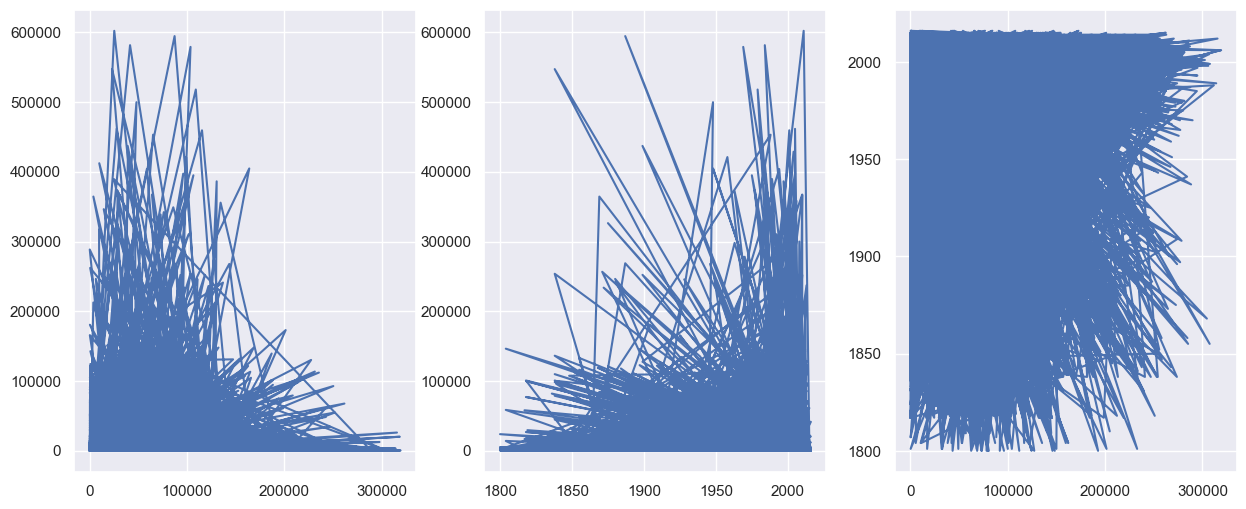

In [91]:
plt.rcParams["figure.figsize"] = (15,6)
plt.subplot(1, 3, 1)
plt.plot(num_df['prevailing_wage'],num_df['no_of_employees'])
plt.subplot(1, 3, 2)
plt.plot(num_df['yr_of_estab'],num_df['no_of_employees'])
plt.subplot(1, 3, 3)
plt.plot(num_df['prevailing_wage'],num_df['yr_of_estab'])
plt.show()

#### Insight 
- not normaly distrbuted

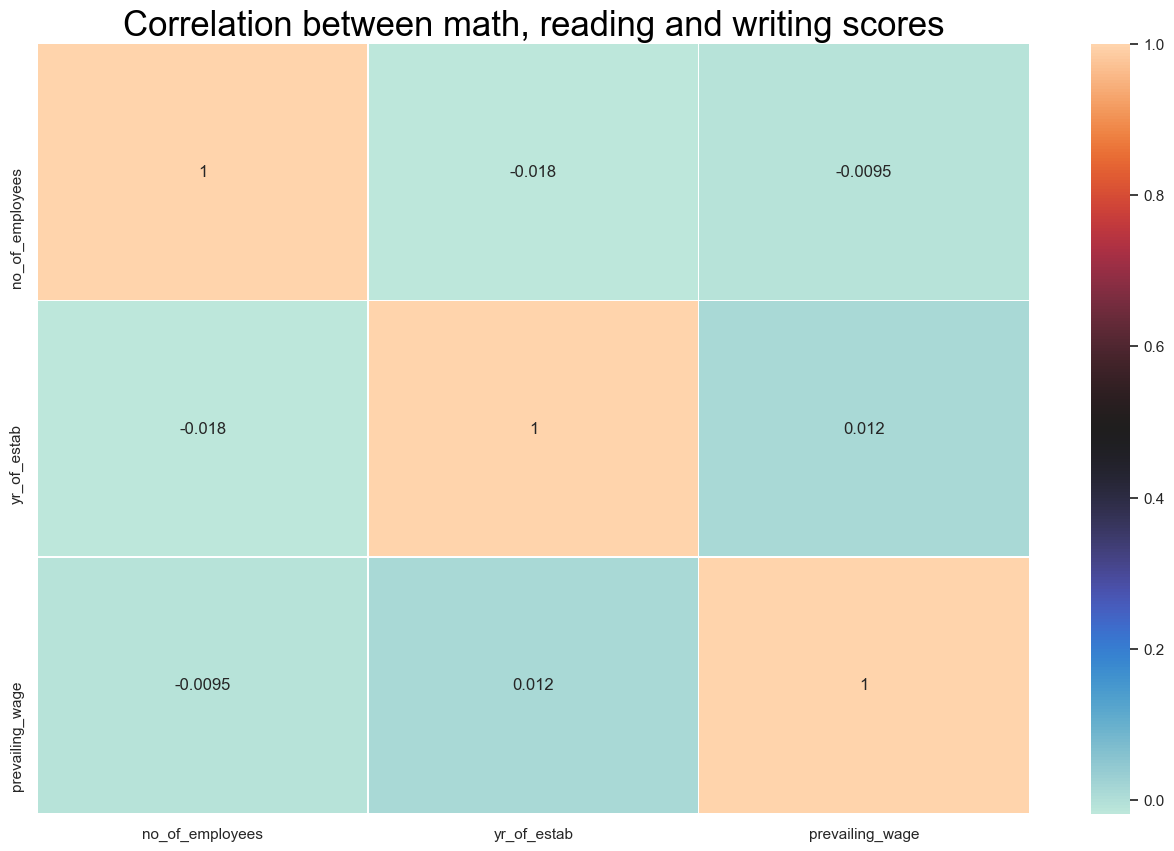

In [92]:
 # Relationship analysis
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(16,10)
#fig.title('corelation between math, reading and writing scores')
plt.title('Correlation between math, reading and writing scores',color='black',size=25)
plt.show()

### Checking for Normal Distribution using Transformations

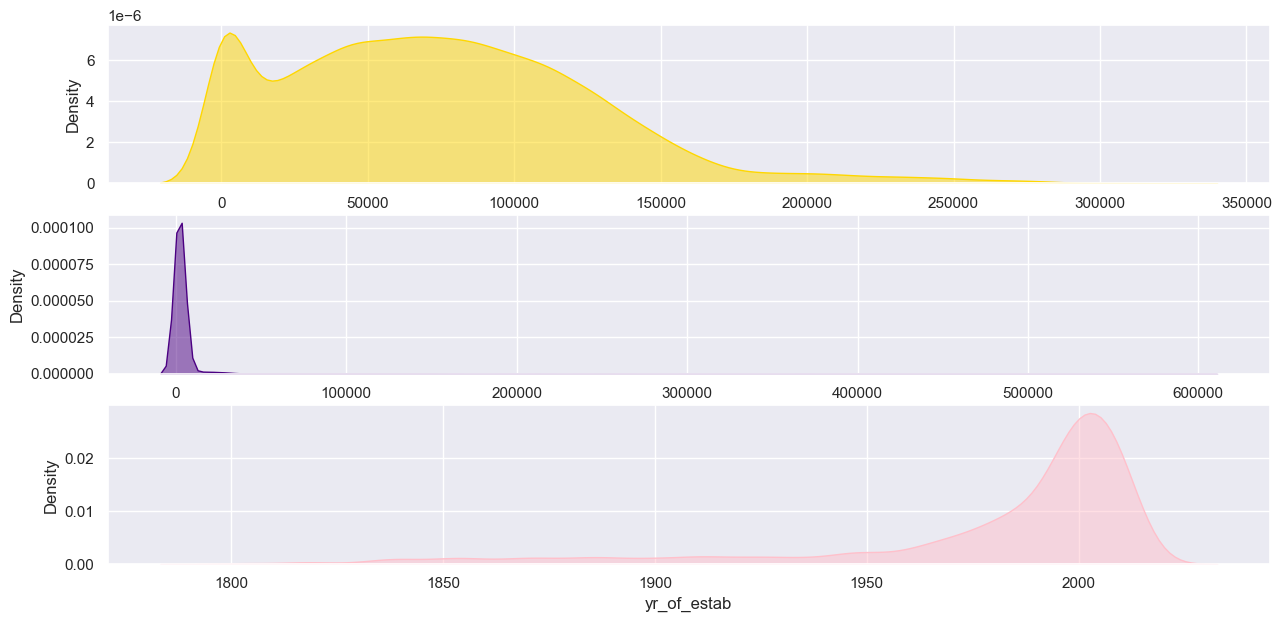

In [93]:
# density plot using seaborn library
fig, axs = plt.subplots(3, 1, figsize=(15, 7))

sns.kdeplot(df['prevailing_wage'],shade=True,label='prevailing_wage',color='gold',ax=axs[0],alpha=0.5)
sns.kdeplot(df['no_of_employees'],shade=True,label='no_of_employees',color='indigo',ax=axs[1],alpha=0.5)
sns.kdeplot(df['yr_of_estab'],shade=True,label='yr_of_estab',color='pink',ax=axs[2],alpha=0.5)
plt.show()

In [94]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))
    plt.show()

#### 3.1 Log Transform

#### 3.1 Box-Cox Transform
- Assumption -
 * your data must be positive

In [100]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


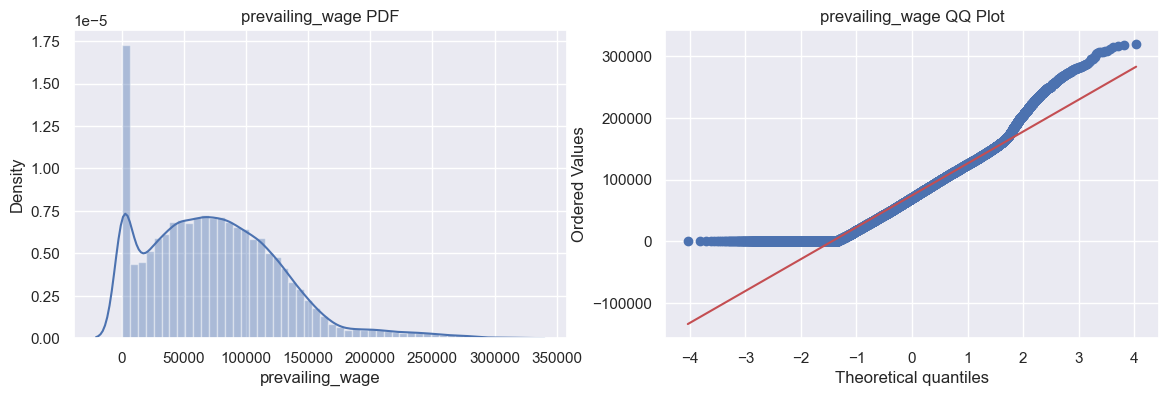

In [101]:
plot_qq_plot('prevailing_wage')

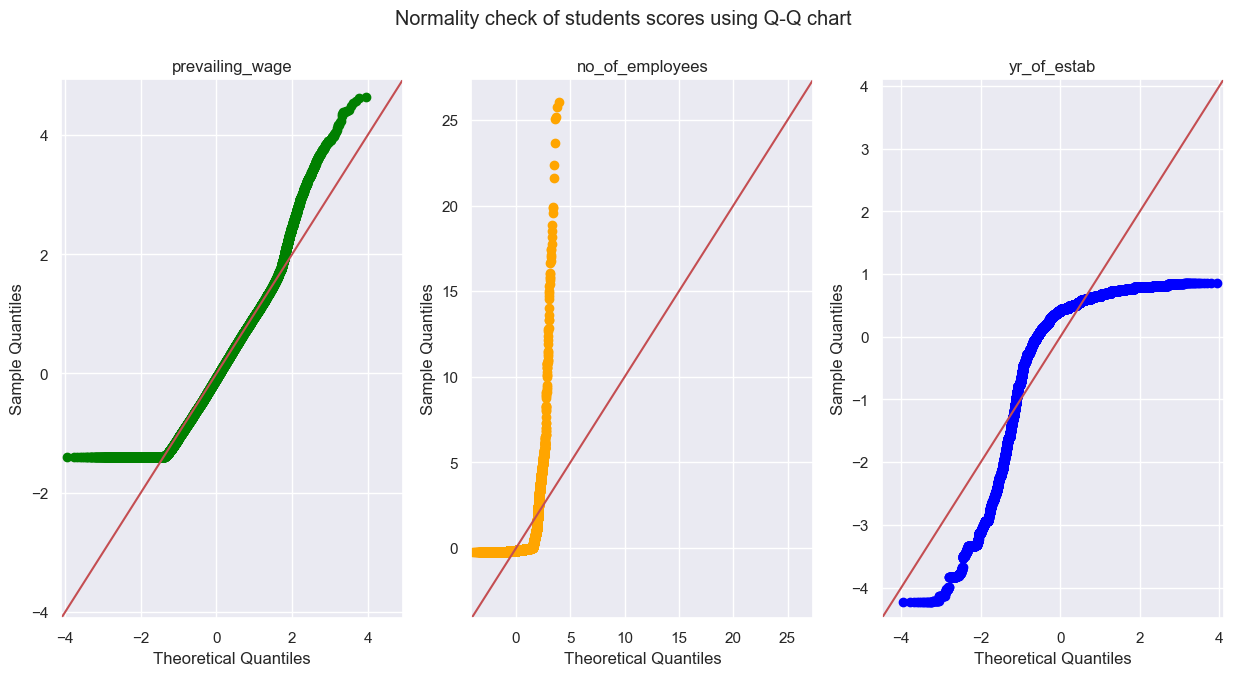

In [102]:
import statsmodels.api as sm # to build the Q-Q graph
# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 7)) 


sm.qqplot(df['prevailing_wage'], markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True, ax=ax1)
ax1.set_title("prevailing_wage")

sm.qqplot(df['no_of_employees'], markerfacecolor = "orange", markeredgecolor = "orange", line='45', fit = True, ax=ax2)
ax2.set_title("no_of_employees")

sm.qqplot(df['yr_of_estab'], markerfacecolor = "blue", markeredgecolor = "blue", line='45', fit = True, ax=ax3)
ax3.set_title("yr_of_estab")

# Set the global title
plt.suptitle("Normality check of students scores using Q-Q chart")

plt.show()

###  Identifying outliers with visualization

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


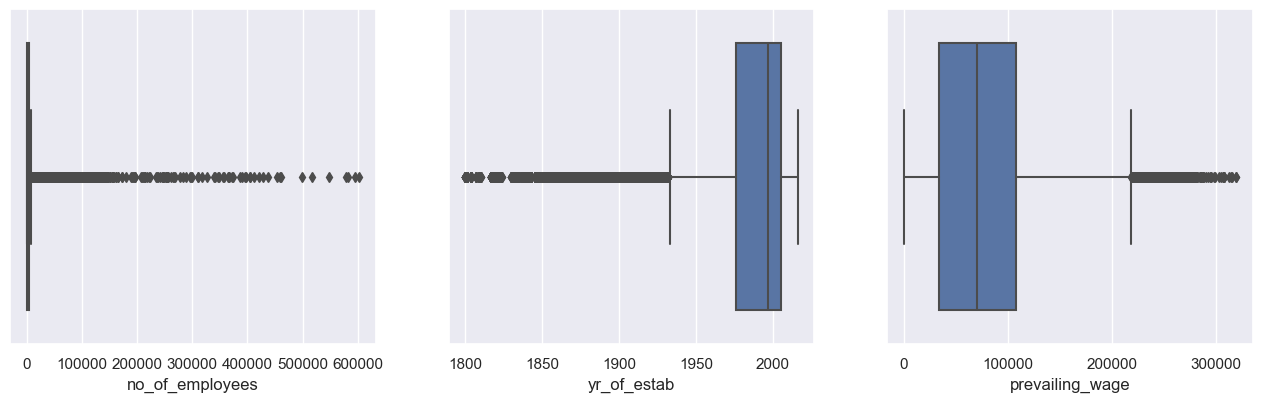

In [103]:
plt.figure(figsize=(50,20))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

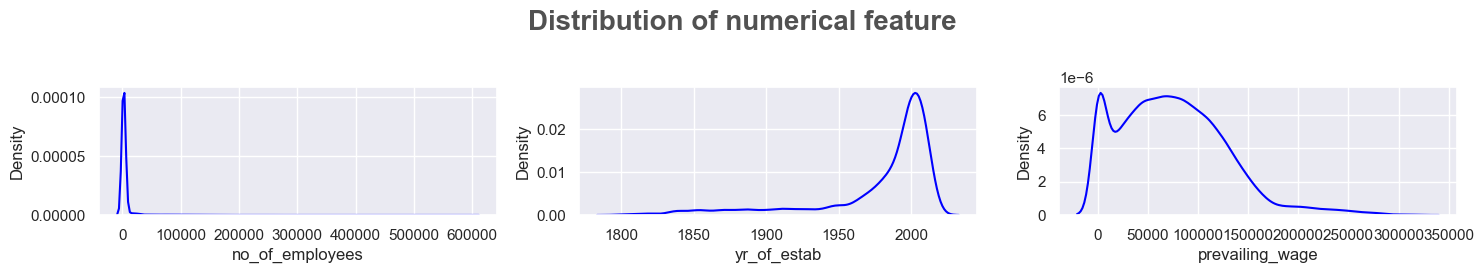

In [104]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [108]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df[['prevailing_wage','no_of_employees','yr_of_estab' ]]
for i in x.columns:
    count_outliers(x,i)

There are outliers in prevailing_wage
Count of outliers are: 427
There are outliers in no_of_employees
Count of outliers are: 1556
There are outliers in yr_of_estab
Count of outliers are: 3260


###  Interquartile Range Method( IQR ) method

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


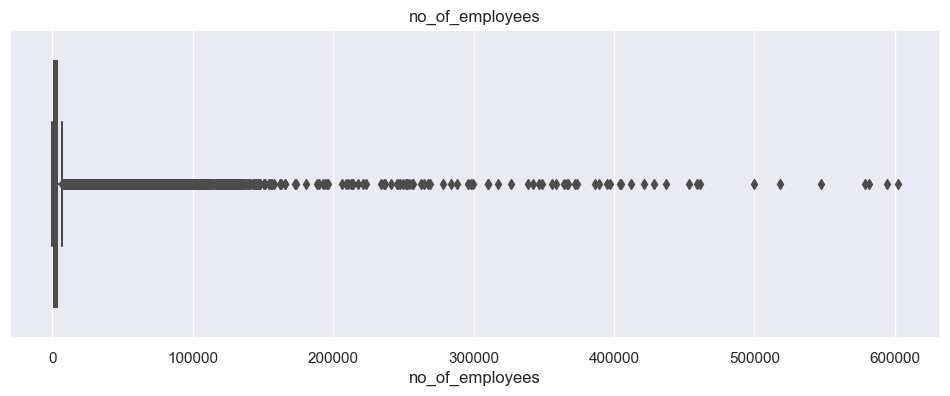

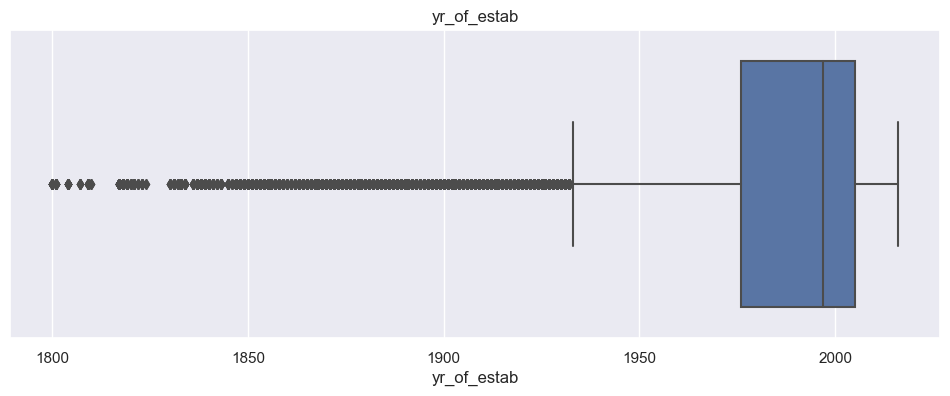

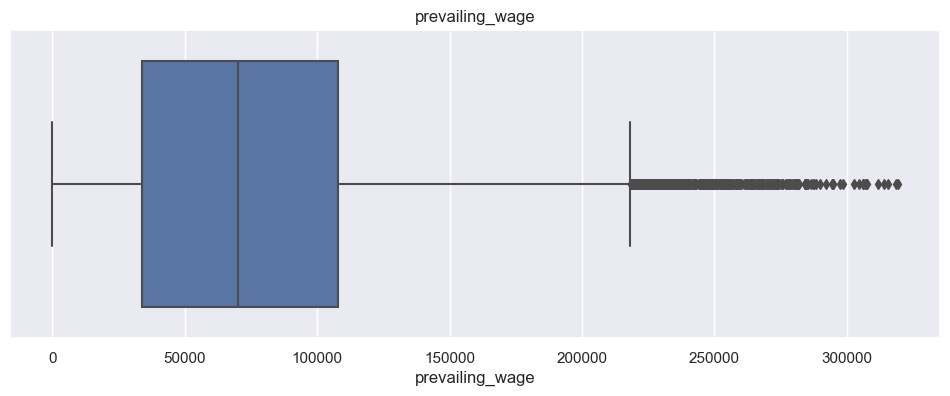

In [113]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [114]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [115]:
remove_outliers_IQR('prevailing_wage')

percentile25 34015.479999999996
percentile75 107735.51250000001
Upper limit 218315.56125000003
Lower limit -76564.56875000002


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [116]:
remove_outliers_IQR('no_of_employees')

percentile25 1022.0
percentile75 3504.0
Upper limit 7227.0
Lower limit -2701.0


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [117]:
remove_outliers_IQR('yr_of_estab')

percentile25 1976.0
percentile75 2005.0
Upper limit 2048.5
Lower limit 1932.5


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [118]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

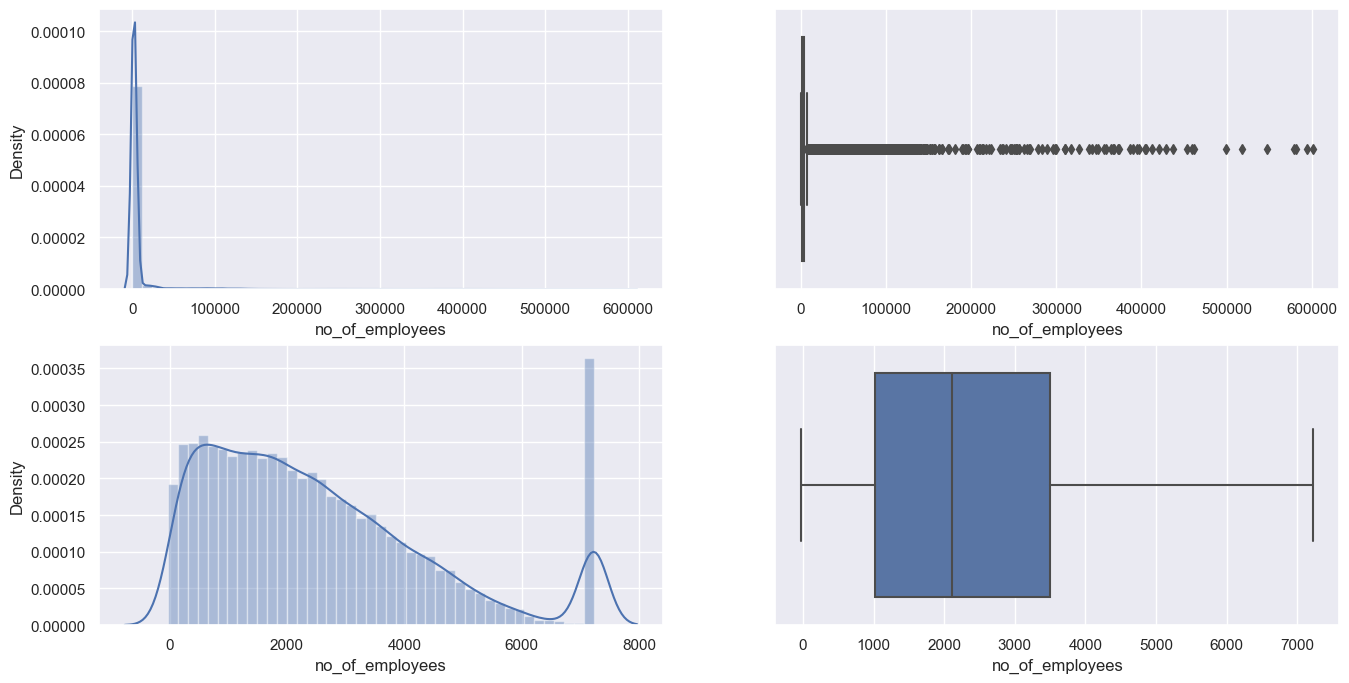

In [119]:
create_comparison_plot(df,df1,"no_of_employees")

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

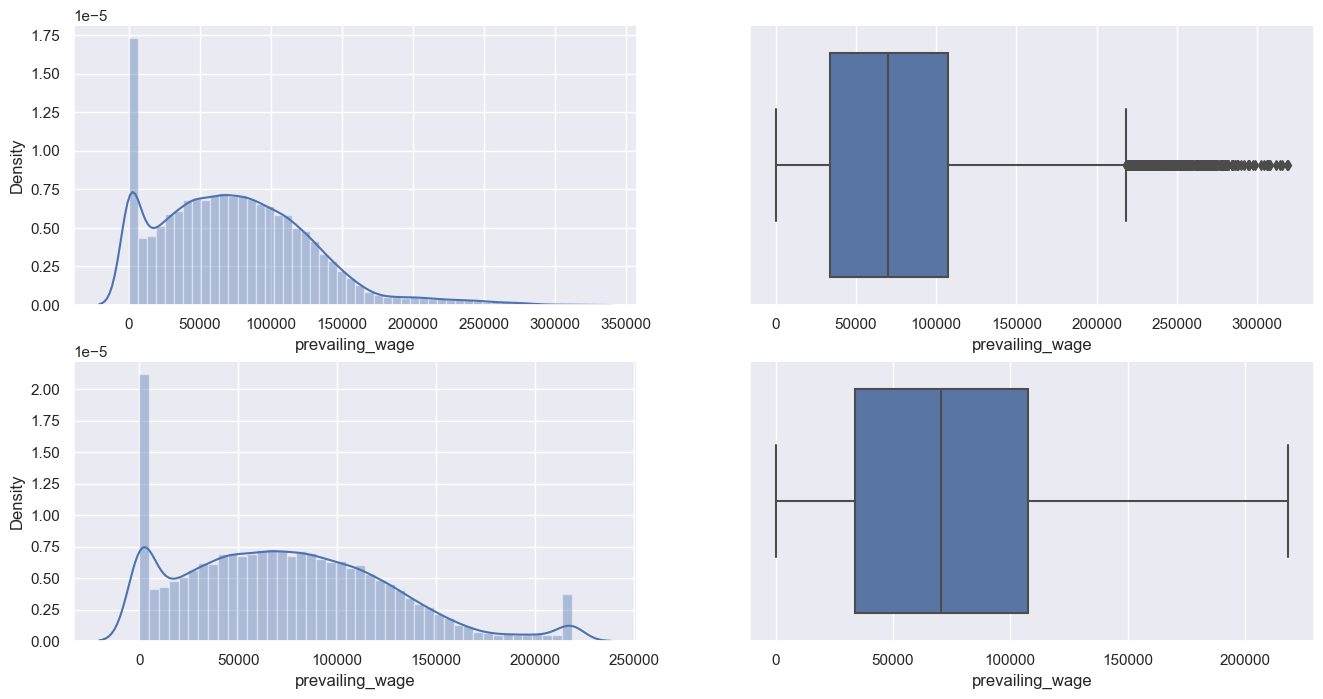

In [120]:
create_comparison_plot(df,df1,"prevailing_wage")

C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

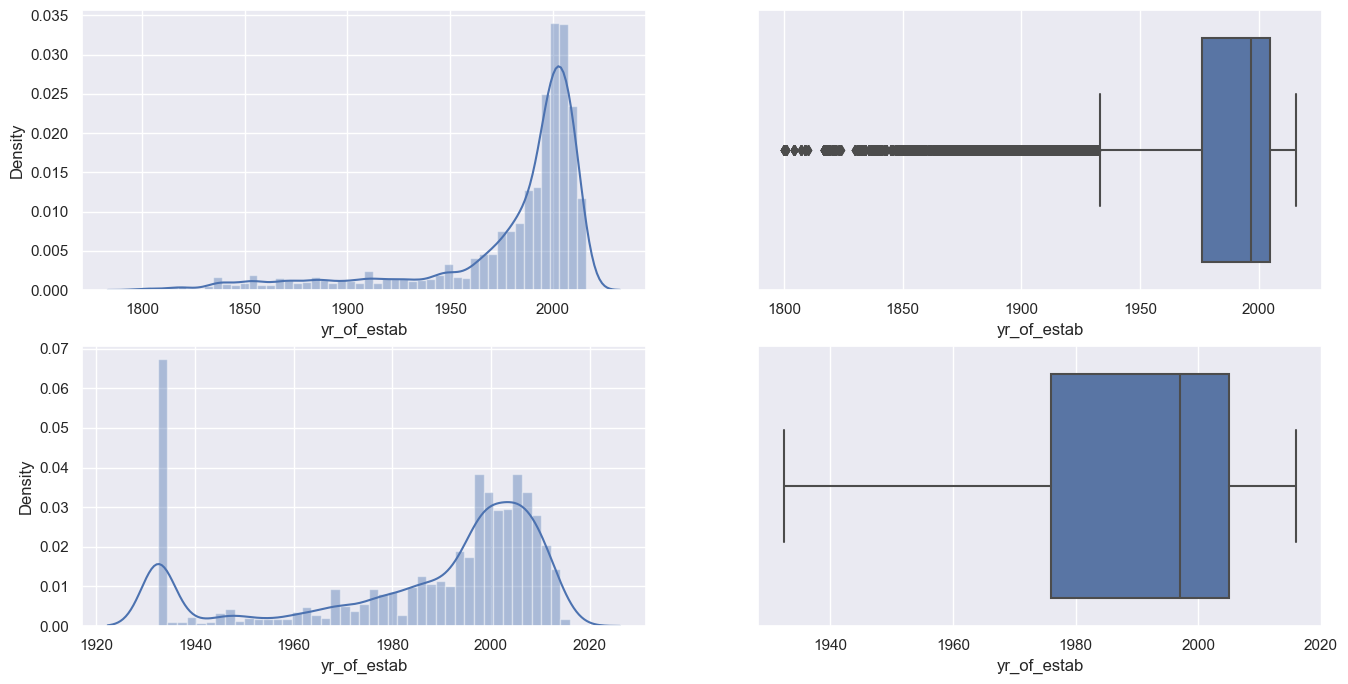

In [121]:
create_comparison_plot(df,df1,"yr_of_estab")

###  Compare Skewness

In [122]:
df.skew()

no_of_employees    12.265260
yr_of_estab        -2.037301
prevailing_wage     0.755776
dtype: float64

In [123]:
df1.skew()

no_of_employees    0.958626
yr_of_estab       -1.111018
prevailing_wage    0.546741
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [ ]:
## Feature engineering:

In [125]:
df1.drop('case_id',axis=True)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,7227.0,2007.0,West,592.20290,Hour,Y,Denied
1,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.65000,Year,Y,Certified
2,Asia,Bachelor's,N,Y,7227.0,2008.0,West,122996.86000,Year,Y,Denied
3,Asia,Bachelor's,N,N,98.0,1932.5,West,83434.03000,Year,Y,Denied
4,Africa,Master's,Y,N,1082.0,2005.0,South,149907.39000,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601.0,2008.0,South,77092.57000,Year,Y,Certified
25476,Asia,High School,Y,N,3274.0,2006.0,Northeast,218315.56125,Year,Y,Certified
25477,Asia,Master's,Y,N,1121.0,1932.5,South,146298.85000,Year,N,Certified
25478,Asia,Master's,Y,Y,1918.0,1932.5,West,86154.77000,Year,Y,Certified


## Encode categorical Features:

In [126]:
data_dummy = pd.get_dummies(df1,drop_first=True)

In [127]:
data_dummy

,no_of_employees,yr_of_estab,prevailing_wage,case_id_EZYV02,case_id_EZYV03,case_id_EZYV04,case_id_EZYV05,case_id_EZYV06,case_id_EZYV07,case_id_EZYV08,...,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y,case_status_Denied
0,7227.0,2007.0,592.20290,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,2412.0,2002.0,83425.65000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,7227.0,2008.0,122996.86000,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1
3,98.0,1932.5,83434.03000,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
4,1082.0,2005.0,149907.39000,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601.0,2008.0,77092.57000,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
25476,3274.0,2006.0,218315.56125,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
25477,1121.0,1932.5,146298.85000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
25478,1918.0,1932.5,86154.77000,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
